## Iteration 5.1

In [ ]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_1"
model_dir = f'../../models/best_model_{iteration}.h5'


In [ ]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [115,115,115,115,115,115,115]
print(sum(dist))

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

2024-11-21 14:59:39.197947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 14:59:39.453740: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 14:59:39.456364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 14:59:40.760324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


805
Training set
Found 8202 images belonging to 7 classes (dist says 805)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [ ]:
import numpy as np
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']

def print_sample_distribution(dataloader, class_names):
    """Print the distribution of samples per class for each batch and overall."""

    # Initialize total counts for all classes
    total_class_counts = {class_name: 0 for class_name in class_names}

    # Per-batch distribution
    print("\nDistribution of samples per class for each batch:")
    print("Number of batches:", len(dataloader))
    for batch_idx in range(len(dataloader)):
        # Fetch batch data
        img, labels = dataloader[batch_idx]

        # Count occurrences of each class in the batch
        batch_class_counts = {class_name: 0 for class_name in class_names}
        for label_vector in labels:
            class_index = np.argmax(label_vector)  # Convert one-hot to class index
            batch_class_counts[class_names[class_index]] += 1
            total_class_counts[class_names[class_index]] += 1

        # Print batch distribution
        print(f"Batch {batch_idx + 1}:")
        for class_name, count in batch_class_counts.items():
            print(f"  Class '{class_name}': {count} samples")

    # Print overall distribution
    print("\nTotal distribution of samples across all batches:")
    for class_name, count in total_class_counts.items():
        print(f"  Class '{class_name}': {count} samples")





# Example usage with your defined dataloader
print("Train Generator Distribution:", test_generator.isValidation)
print_sample_distribution(train_generator, factory.class_names)

# print("\nValidation Generator Distribution:")
# print_sample_distribution(validation_generator, factory.class_names)

# print("\nTest Generator Distribution:")
# print_sample_distribution(test_generator, factory.class_names)



In [ ]:

import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=10, checkpoint_path=model_dir)

Epoch 1/10


2024-11-21 15:02:35.064935: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-11-21 15:02:35.115269: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-11-21 15:02:35.115325: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-11-21 15:02:35.136359: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26150912 exceeds 10% of free system memory.
2024-11-21 15:02:35.158705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28901376 exceeds 10% of free system memory.


25/25 [==============================] - ETA: 0s - loss: 2.6440 - accuracy: 0.1975
Epoch 1: val_loss improved from inf to 2.47138, saving model to ../../models/best_model_iteration_5_1.h5


/home/renemartensen/Desktop/Aarhus universitet/Deep Learning/deep_learning_group2/mothermark_cancer_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 30s 1s/step - loss: 2.6440 - accuracy: 0.1975 - val_loss: 2.4714 - val_accuracy: 0.2251
Training set
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 2.5073 - accuracy: 0.2425
Epoch 2: val_loss improved from 2.47138 to 2.35690, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 27s 1s/step - loss: 2.5073 - accuracy: 0.2425 - val_loss: 2.3569 - val_accuracy: 0.2390
Training set
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 2.1543 - accuracy: 0.2825
Epoch 3: val_loss improved from 2.35690 to 1.88780, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 27s 1s/step - loss: 2.1543 - accuracy: 0.2825 - val_loss: 1.8878 - val_accuracy: 0.3553
Training set
Epoch 4/10
25/25 [==============================] - ETA: 0s - loss: 1.8659 - accuracy: 0.3537
Epoch 4: val_loss improved from 1.88780 to 1.47373, saving model to ../../

All layers have been unfrozen.
Epoch 1/10
25/25 [==============================] - 46s 2s/step - loss: 2.7179 - accuracy: 0.3288 - val_loss: 1.3273 - val_accuracy: 0.5932
Training set
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 2.5424 - accuracy: 0.3462 - val_loss: 1.3068 - val_accuracy: 0.6667
Training set
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 2.5022 - accuracy: 0.3850 - val_loss: 1.5949 - val_accuracy: 0.6221
Training set
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 2.4503 - accuracy: 0.4112 - val_loss: 2.3448 - val_accuracy: 0.4722
Training set
Epoch 5/10
25/25 [==============================] - 34s 1s/step - loss: 2.5266 - accuracy: 0.4162 - val_loss: 2.3215 - val_accuracy: 0.5318
Training set
Epoch 6/10
25/25 [==============================] - 34s 1s/step - loss: 2.3582 - accuracy: 0.4588 - val_loss: 2.0440 - val_accuracy: 0.5909
Training set
Epoch 7/10
25/25 [==============================] -

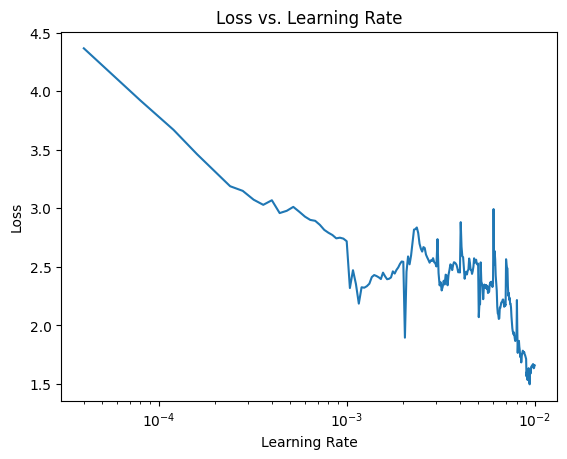

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-5, 5e-3])

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.6982 - accuracy: 0.4825
Epoch 1: val_loss improved from inf to 1.97176, saving model to ../../models/best_model_iteration_5_1.h5


/home/renemartensen/Desktop/Aarhus universitet/Deep Learning/deep_learning_group2/mothermark_cancer_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 34s 1s/step - loss: 1.6982 - accuracy: 0.4825 - val_loss: 1.9718 - val_accuracy: 0.5671
Training set
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 1.5673 - accuracy: 0.5075
Epoch 2: val_loss improved from 1.97176 to 1.82878, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 34s 1s/step - loss: 1.5673 - accuracy: 0.5075 - val_loss: 1.8288 - val_accuracy: 0.5868
Training set
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.4094 - accuracy: 0.5250
Epoch 3: val_loss improved from 1.82878 to 1.70525, saving model to ../../models/best_model_iteration_5_1.h5
25/25 [==============================] - 32s 1s/step - loss: 1.4094 - accuracy: 0.5250 - val_loss: 1.7053 - val_accuracy: 0.6181
Training set
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 1.3823 - accuracy: 0.5337
Epoch 4: val_loss did not improve from 1.70525
25/25 [====================

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.5869086247169345
Accuracy on test set: 0.6903935074806213
F1 Score: 0.7121234617315392


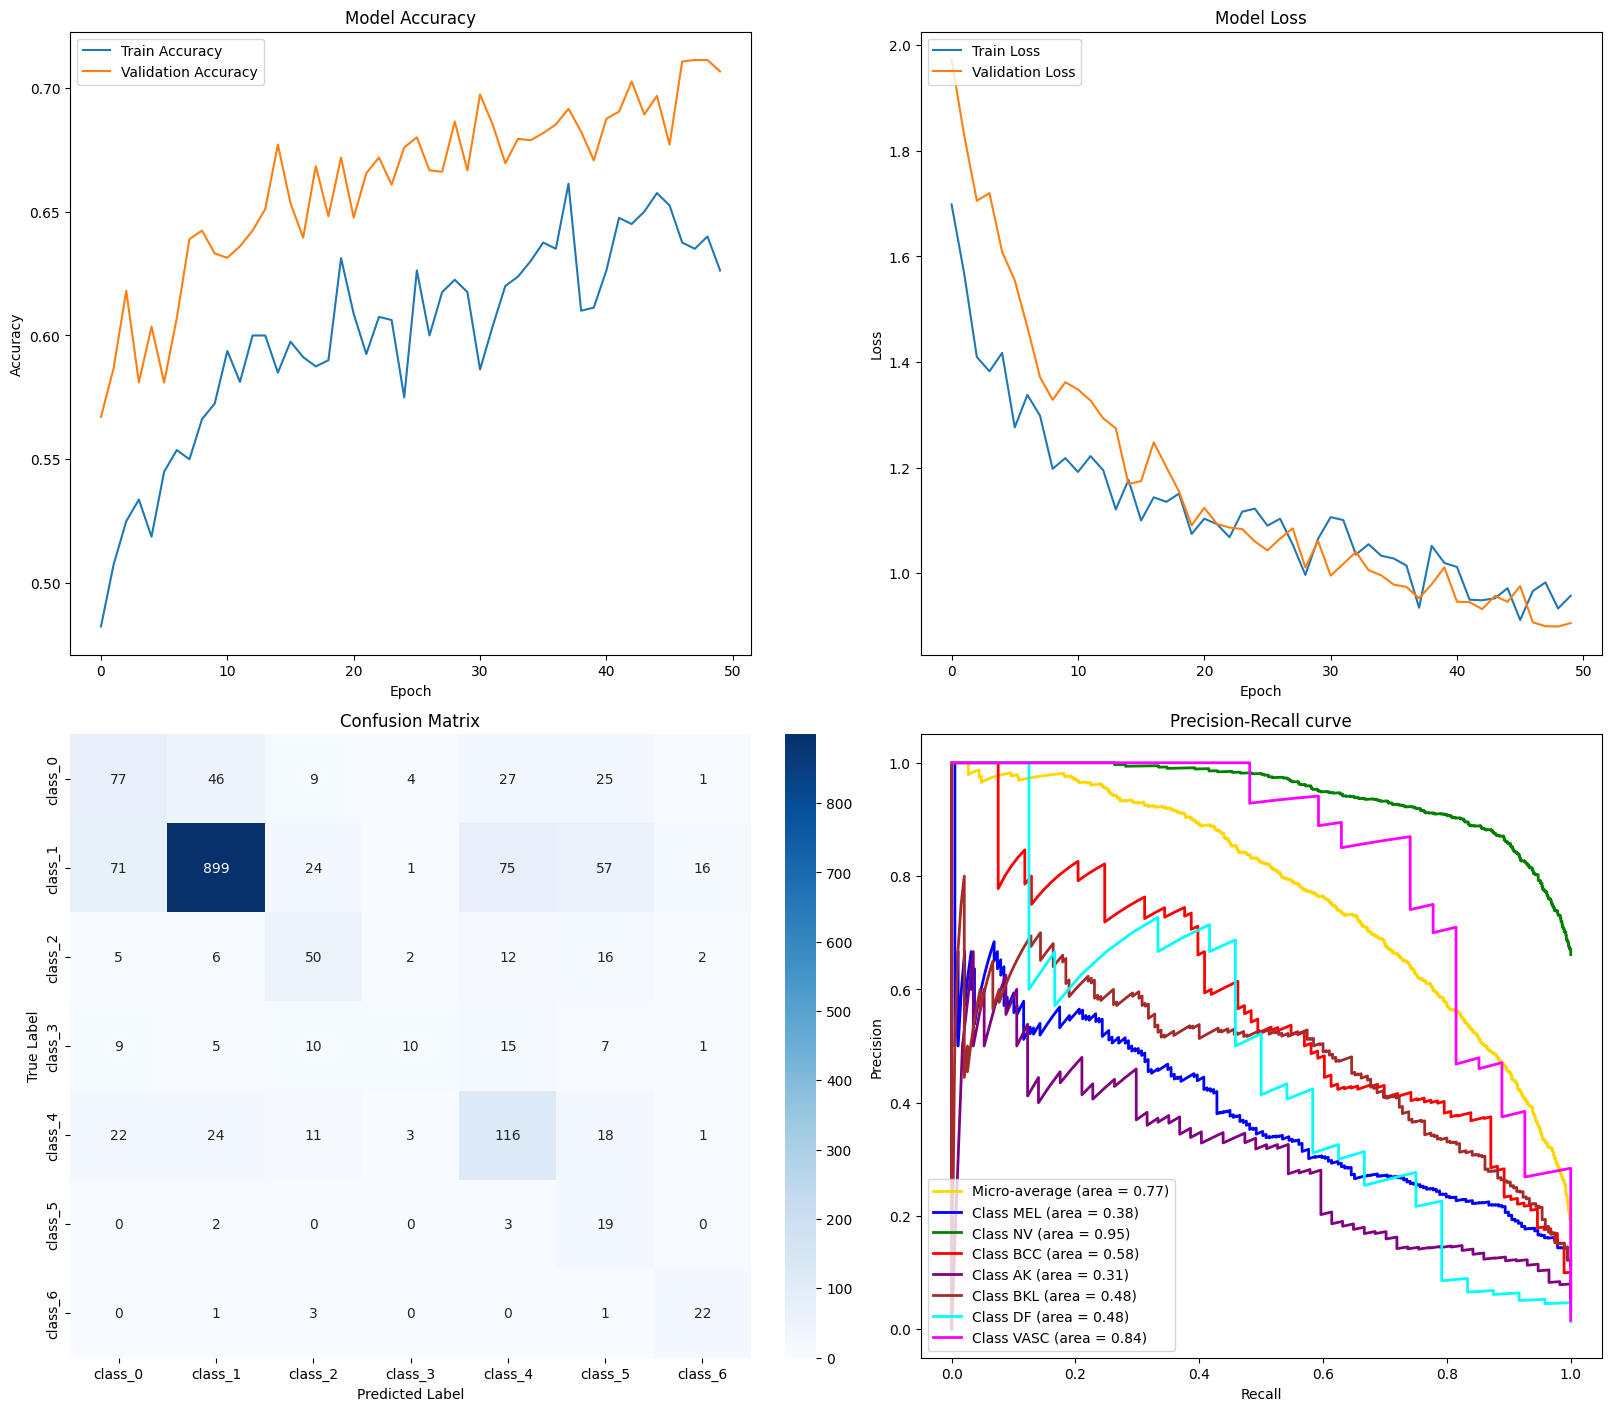

In [ ]:
from plot_utils import show_all_plots
from tensorflow.keras.models import load_model

m = load_model(model_dir)

show_all_plots(history, m, test_generator)

## Iteration 5.2

Crazy augmentations

In [1]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_2"
model_dir = f'../../models/best_model_{iteration}.h5'


In [8]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [3]:

import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [4]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 2.0066 - accuracy: 0.3402
Epoch 1: val_loss improved from inf to 1.28990, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 76s 294ms/step - loss: 2.0066 - accuracy: 0.3402 - val_loss: 1.2899 - val_accuracy: 0.5567
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.5690 - accuracy: 0.4601
Epoch 2: val_loss improved from 1.28990 to 1.17582, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 78s 306ms/step - loss: 1.5690 - accuracy: 0.4601 - val_loss: 1.1758 - val_accuracy: 0.6123
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 1.4560 - accuracy: 0.4965
Epoch 3: val_loss did not improve from 1.17582
256/256 [==============================] - 80s 311ms/step - loss: 1.4560 - accuracy: 0.4965 - val_loss: 1.1809 - val_accuracy: 0.5949
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 1.3915 - accuracy: 0.5161
Epoch 4: val_loss improved from 1.17582 to 1.05107, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 81s 318ms/step - loss: 1.3915 - accuracy: 0.5161 - val_loss: 1.0511 - val_accuracy: 0.6678
Epoch 5/5
256/256 [==============================] - ETA: 

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 120s 462ms/step - loss: 2.1560 - accuracy: 0.4081 - val_loss: 1.1214 - val_accuracy: 0.6875
Epoch 2/10
256/256 [==============================] - 130s 508ms/step - loss: 1.7556 - accuracy: 0.4885 - val_loss: 1.3002 - val_accuracy: 0.6939
Epoch 3/10
256/256 [==============================] - 142s 555ms/step - loss: 1.5019 - accuracy: 0.5413 - val_loss: 1.2314 - val_accuracy: 0.6406
Epoch 4/10
256/256 [==============================] - 119s 462ms/step - loss: 1.2704 - accuracy: 0.5775 - val_loss: 0.9630 - val_accuracy: 0.6904
Epoch 5/10
256/256 [==============================] - 127s 494ms/step - loss: 1.1459 - accuracy: 0.6029 - val_loss: 0.9767 - val_accuracy: 0.6939
Epoch 6/10
256/256 [==============================] - 119s 464ms/step - loss: 1.0460 - accuracy: 0.6257 - val_loss: 1.0000 - val_accuracy: 0.6742
Epoch 7/10
256/256 [==============================] - 105s 410ms/step - loss: 0.9809 - accura

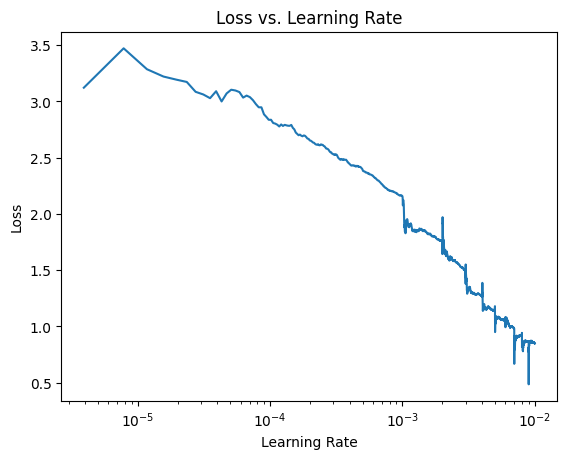

In [5]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [6]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 0.7989 - accuracy: 0.7013
Epoch 1: val_loss improved from inf to 1.07193, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 104s 402ms/step - loss: 0.7989 - accuracy: 0.7013 - val_loss: 1.0719 - val_accuracy: 0.6713
Epoch 2/50


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.7858 - accuracy: 0.7032
Epoch 2: val_loss improved from 1.07193 to 0.98818, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 97s 379ms/step - loss: 0.7858 - accuracy: 0.7032 - val_loss: 0.9882 - val_accuracy: 0.6956
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 0.7861 - accuracy: 0.7100
Epoch 3: val_loss improved from 0.98818 to 0.95300, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 96s 373ms/step - loss: 0.7861 - accuracy: 0.7100 - val_loss: 0.9530 - val_accuracy: 0.7066
Epoch 4/50
256/256 [==============================] - ETA: 0s - loss: 0.7515 - accuracy: 0.7220
Epoch 4: val_loss improved from 0.95300 to 0.93590, saving model to ../../models/best_model_iteration_5_2.h5
256/256 [==============================] - 90s 351ms/step - loss: 0.7515 - accuracy: 0.7220 - val_loss: 0.9359 - val_accuracy: 0

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6893861792426973
Accuracy on test set: 0.7453703880310059
F1 Score: 0.7537624875609487


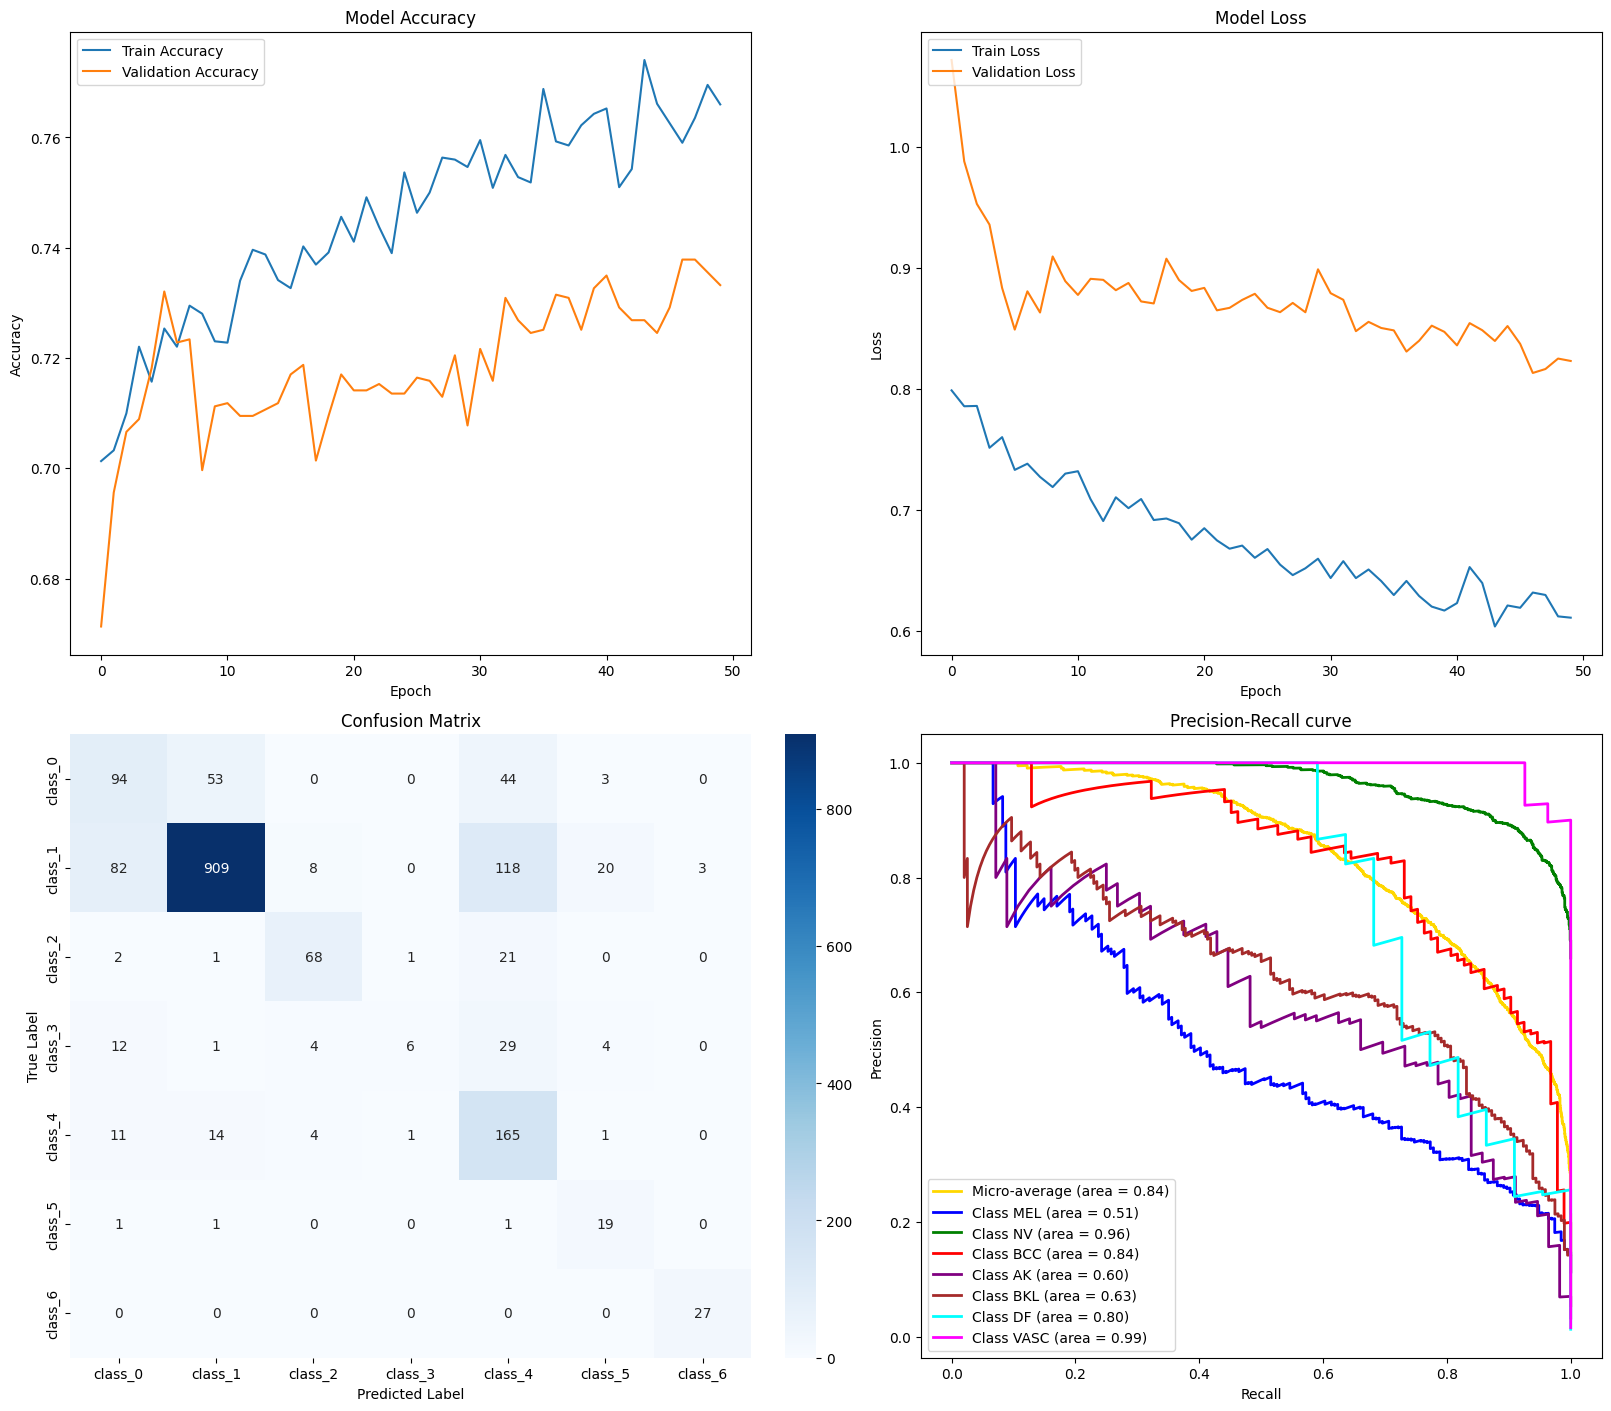

In [19]:

from plot_utils import show_all_plots
from tensorflow.keras.models import load_model

m = load_model(model_dir)
histories = [history1, history2]
show_all_plots(history2, m, test_generator)

## Iteration 5.3

Normaæ augmentations

In [ ]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_3"
model_dir = f'../../models/best_model_{iteration}.h5'


In [ ]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [ ]:

import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [ ]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 2.0842 - accuracy: 0.3308
Epoch 1: val_loss improved from inf to 1.61470, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 79s 304ms/step - loss: 2.0842 - accuracy: 0.3308 - val_loss: 1.6147 - val_accuracy: 0.4485
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.4163 - accuracy: 0.5031
Epoch 2: val_loss improved from 1.61470 to 1.21388, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 79s 308ms/step - loss: 1.4163 - accuracy: 0.5031 - val_loss: 1.2139 - val_accuracy: 0.5885
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.5709
Epoch 3: val_loss improved from 1.21388 to 1.18933, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 77s 302ms/step - loss: 1.2362 - accuracy: 0.5709 - val_loss: 1.1893 - val_accuracy: 0.5990
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 1.1136 - accuracy: 0.6132
Epoch 4: val_loss improved from 1.18933 to 1.12104, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 78s 303ms/step - loss: 1.1136 - accuracy: 0.6132 - val_loss: 1.1210 - val_accuracy: 0.6

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 117s 450ms/step - loss: 1.8979 - accuracy: 0.4844 - val_loss: 1.1475 - val_accuracy: 0.6753
Epoch 2/10
256/256 [==============================] - 125s 487ms/step - loss: 1.3766 - accuracy: 0.6001 - val_loss: 1.3865 - val_accuracy: 0.6082
Epoch 3/10
256/256 [==============================] - 120s 466ms/step - loss: 1.1597 - accuracy: 0.6556 - val_loss: 1.1851 - val_accuracy: 0.6817
Epoch 4/10
256/256 [==============================] - 123s 478ms/step - loss: 0.9694 - accuracy: 0.6893 - val_loss: 1.1648 - val_accuracy: 0.6476
Epoch 5/10
256/256 [==============================] - 113s 440ms/step - loss: 0.8320 - accuracy: 0.7146 - val_loss: 1.3842 - val_accuracy: 0.5995
Epoch 6/10
256/256 [==============================] - 109s 425ms/step - loss: 0.7256 - accuracy: 0.7493 - val_loss: 1.2977 - val_accuracy: 0.6088
Epoch 7/10
256/256 [==============================] - 106s 415ms/step - loss: 0.6756 - accura

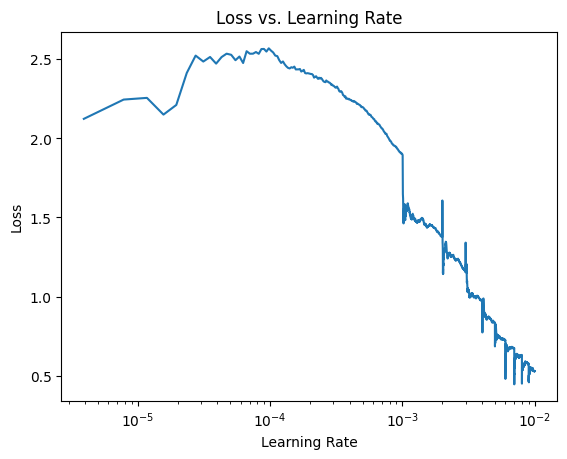

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [ ]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.8207
Epoch 1: val_loss improved from inf to 1.14048, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 119s 463ms/step - loss: 0.4911 - accuracy: 0.8207 - val_loss: 1.1405 - val_accuracy: 0.6534
Epoch 2/50


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.4897 - accuracy: 0.8265
Epoch 2: val_loss improved from 1.14048 to 1.04273, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 113s 440ms/step - loss: 0.4897 - accuracy: 0.8265 - val_loss: 1.0427 - val_accuracy: 0.6765
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 0.4884 - accuracy: 0.8231
Epoch 3: val_loss improved from 1.04273 to 0.98768, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 133s 520ms/step - loss: 0.4884 - accuracy: 0.8231 - val_loss: 0.9877 - val_accuracy: 0.6933
Epoch 4/50
256/256 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.8348
Epoch 4: val_loss improved from 0.98768 to 0.96369, saving model to ../../models/best_model_iteration_5_3.h5
256/256 [==============================] - 120s 468ms/step - loss: 0.4634 - accuracy: 0.8348 - val_loss: 0.9637 - val_accuracy

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6361952736863851
Accuracy on test set: 0.7193287014961243
F1 Score: 0.7340156232009418


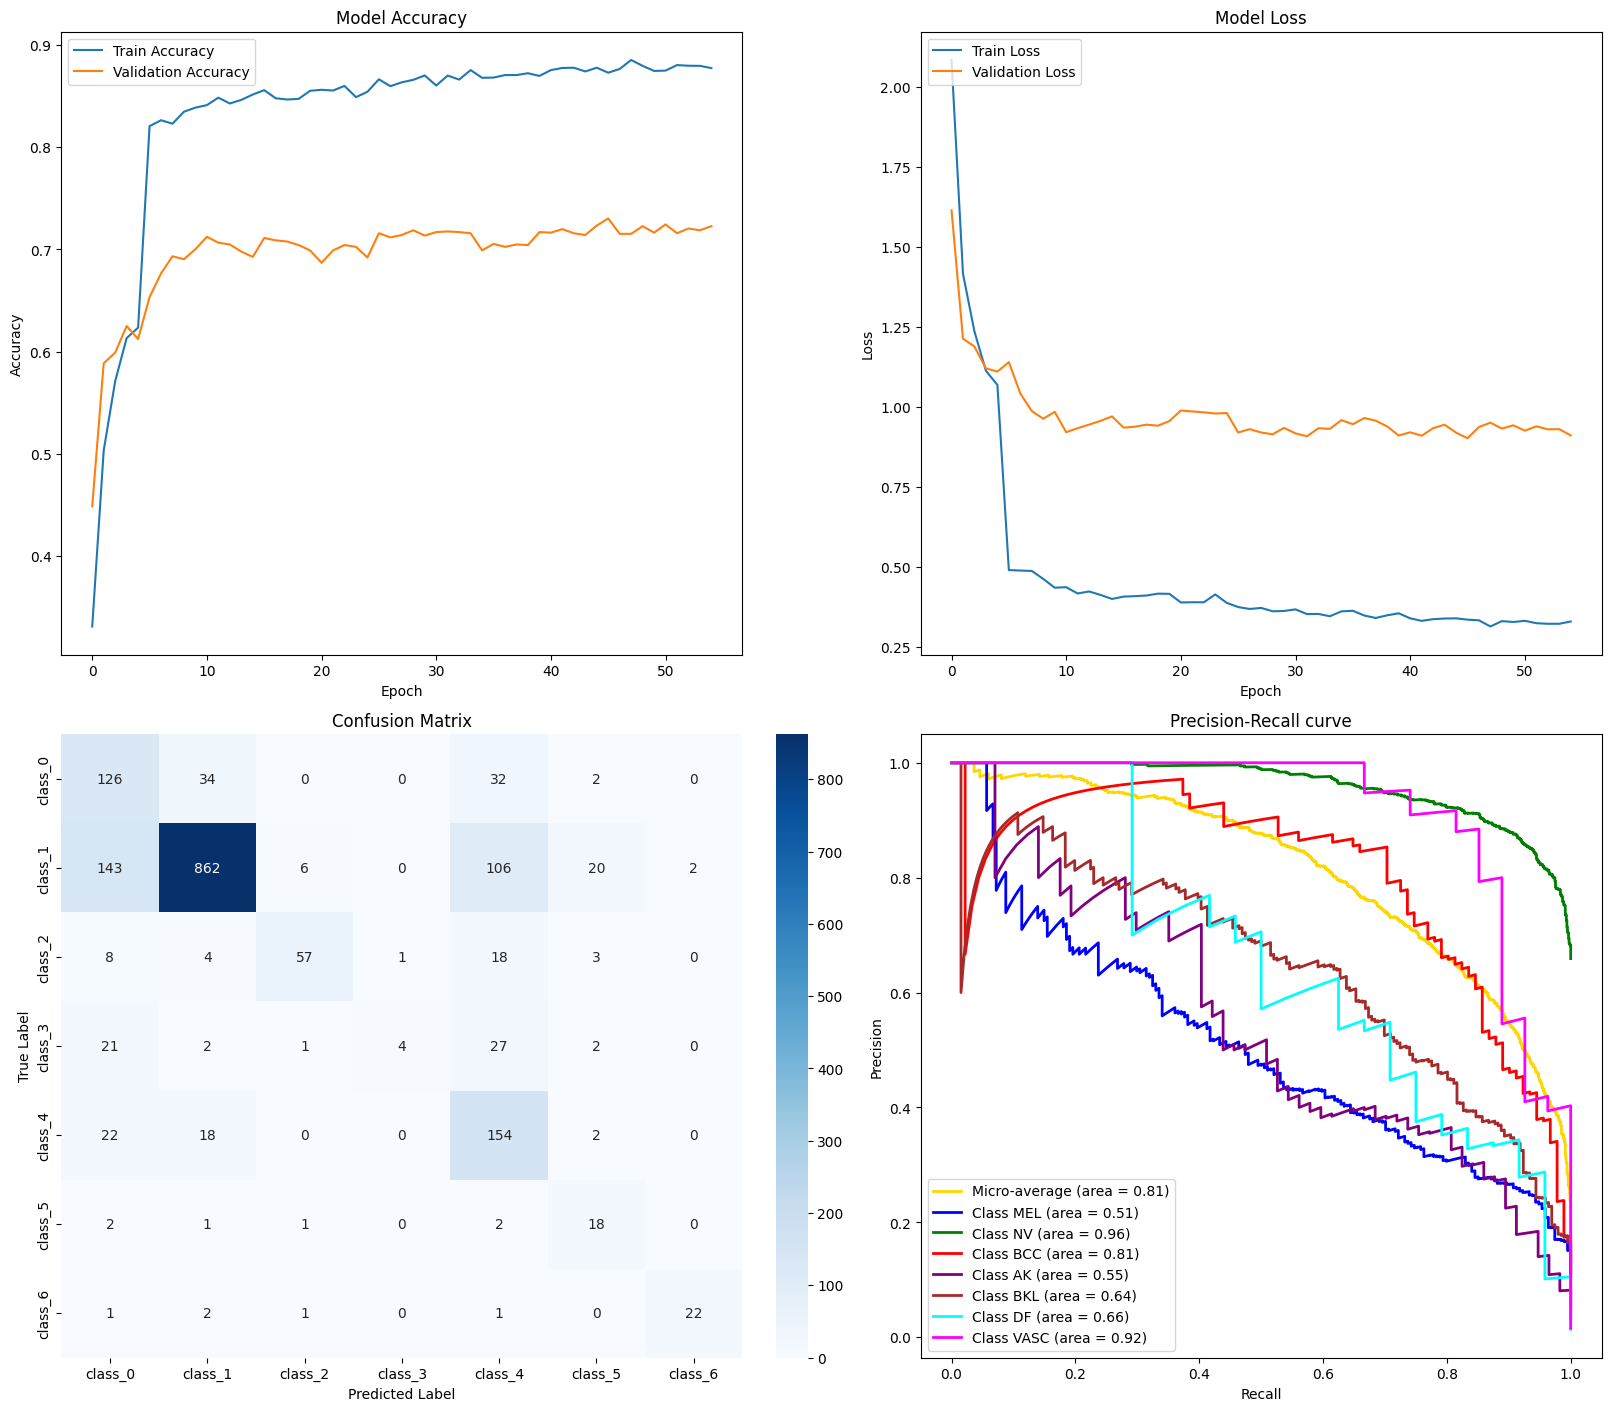

In [ ]:

from tensorflow.keras.models import load_model

m = load_model(model_dir)
show_all_plots(history2, m, test_generator)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_recall_curve, average_precision_score, f1_score
from sklearn.preprocessing import label_binarize

class CombinedHistory:
    def __init__(self, combined_history_dict):
        self.history = combined_history_dict

def combine_histories(histories):
    combined_history = {}
    for key in histories[0].history.keys():
        combined_history[key] = []
        for history in histories:
            combined_history[key].extend(history.history[key])
    return CombinedHistory(combined_history)

# Define the function to plot all metrics including balanced accuracy
def show_all_plots(history, model, validation_generator):


    if isinstance(histories, list):  # Check if it's a list of histories
        history = combine_histories(histories)
    else:  # If single history is passed, use it directly
        history = histories.history
    


    # Assuming `validation_generator` has class indices mapped to class names
    class_names = list(validation_generator.class_names)
    print(class_names)

    # Calculate balanced accuracy for each epoch

    # Get true labels and predictions for the entire validation set
    y_true = []
    y_pred = []

    for i in range(len(validation_generator)):
        X_val_batch, y_val_batch = validation_generator[i]
        y_pred_batch = model.predict(X_val_batch, verbose=0)
        y_pred.extend(y_pred_batch)  # Keep the raw probabilities for precision-recall
        y_true.extend(y_val_batch)   # Keep the one-hot encoded true labels

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate balanced accuracy, confusion matrix, and F1 score
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    balanced_acc = balanced_accuracy_score(y_true_labels, y_pred_labels)
    conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

    # Print metrics
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Accuracy on test set: {model.evaluate(validation_generator, verbose=0)[1]}")
    print(f"F1 Score: {f1_score(y_true_labels, y_pred_labels, average='weighted')}")

    # Set up a 2x2 grid for the plots
    plt.figure(figsize=(16,14), constrained_layout=True)
    
    # 1. Accuracy plot
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # 2. Loss plot
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # 3. Confusion matrix plot
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 4. Precision-Recall Curve plot
    plt.subplot(2, 2, 4)
    show_precision_recall(y_true, y_pred)

    # Show all the plots
    plt.show()

def show_precision_recall(y_test, predictions):
    class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC']
    
    # Binarize the output for multiclass
    y_test = label_binarize(y_test, classes=range(len(class_names)))
    predictions = np.array(predictions)

    precision = dict()
    recall = dict()
    average_precision = dict()
    
    # Compute Precision-Recall and average precision for each class
    for i in range(len(class_names)):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predictions[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], predictions[:, i])

    # Compute micro-average Precision-Recall curve and area
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), predictions.ravel())
    average_precision["micro"] = average_precision_score(y_test, predictions, average="micro")
    
    # Plot Precision-Recall curve
    plt.plot(recall["micro"], precision["micro"], color='gold', lw=2, label=f'Micro-average (area = {average_precision["micro"]:0.2f})')
    for i, color in enumerate(['blue', 'green', 'red', 'purple', 'brown', 'cyan', 'magenta']):
        plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {class_names[i]} (area = {average_precision[i]:0.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='best')


# Iteration 5.4

### dataloader

In [1]:
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import Sequence, to_categorical
from itertools import chain

class Dataloader(Sequence):
    def __init__(self, data, batch_size, image_size, is_validation=False, preprocess_function=None, class_distribuition=[], class_names=[]):
        #self.data_dir = data_dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.isValidation = is_validation
        self.class_distribution = class_distribuition if not is_validation else []
        self.preprocess_function = preprocess_function

        self.datagen = ImageDataGenerator(
            horizontal_flip=True,
            vertical_flip=True,
            shear_range=50, 
            height_shift_range=0.2,
            width_shift_range=0.2,
            rotation_range=360, 
            brightness_range=[0.3, 1.8], 
            channel_shift_range= random.uniform(20, 50),
            zoom_range=0.3)

        self.class_names = class_names
        self.num_classes = len(self.class_names)
        self.class_to_label = {class_name: i for i, class_name in enumerate(self.class_names)} # mapping {'class1': 0, 'class2': 1, ...})

        self.image_paths, self.labels = zip(*data)
        self.image_paths = list(self.image_paths)  # Convert from tuple to list
        self.labels = list(self.labels)           # Convert from tuple to list

        self.indexes_for_class = [[] for _ in range(self.num_classes)]

        self.all_image_indices = self._create_indices_distr() if not self.isValidation else list(range(len(self.image_paths)))
        self.samples = len(self.all_image_indices)
        #self._shuffle_indices()
        print(f"Found {len(self.image_paths)} images belonging to {self.num_classes} classes (dist says {sum(self.class_distribution)})")
        self._shuffle_indices()


    def _create_indices_distr(self):
        for index, label in enumerate(self.labels):
            self.indexes_for_class[label].append(index) # I assume its list 4 has all the indexes for label class_5

        res = list(chain.from_iterable(self.indexes_for_class)) # flattens the list-of-lists to one list
        return res





    

    def _load_data(self):
        image_paths = []
        labels = []
        for class_name in self.class_names:
            class_dir = os.path.join(self.data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image_paths.append(image_path)
                labels.append(self.class_to_label[class_name])

        #print(f"Found {len(image_paths)} images belonging to {self.num_classes} classes (dist says {sum(self.class_distribution)})")
        return image_paths, labels

    def _preprocess_image(self, image_path):
      img = load_img(image_path, target_size=self.image_size)
      x = img_to_array(img)

      if self.preprocess_function:
        x = self.preprocess_function(x)

      if not self.isValidation:
          pass
        #x = x.reshape((1,) + x.shape)
        #x = next(self.datagen.flow(x, batch_size=1))[0]

      return x

    def _shuffle_indices(self):
        random.shuffle(self.all_image_indices)


    def __len__(self):
        num_samples = len(self.all_image_indices) # no_images=100 batchsize=20, then 100/20=5 number of iterations to get through the whole dataset
        return num_samples // self.batch_size
    
    def __getitem__(self, index):
        start = index * self.batch_size
        end = start + self.batch_size
        images = []
        labels = []

        batch_image_indices = self.all_image_indices[start:end]

        for image_index in batch_image_indices:
            image_path = self.image_paths[image_index]
            image = self._preprocess_image(image_path)
            images.append(image)
            labels.append(to_categorical(self.labels[image_index], num_classes=self.num_classes))

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if not self.isValidation:
            self._shuffle_indices()




class DataloaderFactory():
    def __init__(self, dir, image_size, batch_size, set_distribution, class_distribution=[], preprocess_function=None):
        self.dir = dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.set_distribution = set_distribution
        self.class_distribution = class_distribution
        self.preprocess_function = preprocess_function
        self.class_names = []

    def _load_data(self):
        """Load images and labels as tuples (path, label)."""
        data = []
        self.class_names = sorted(os.listdir(self.dir))
        for label, class_name in enumerate(self.class_names):
            class_dir = os.path.join(self.dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                data.append((image_path, label))  # Append (path, label) as a tuple
        return data

    def _split_data(self, data):
        """Split data into train, validation, and test sets based on the specified distribution."""
        indices = list(range(len(data)))
        _, val_ratio, test_ratio = [p / 100 for p in self.set_distribution]

        labels = [label for _, label in data]
        train_idxs, test_idxs, _, _ = train_test_split(
            indices, labels, test_size=(val_ratio + test_ratio), stratify=labels
        )
        val_split = val_ratio / (val_ratio + test_ratio)
        val_idxs, test_idxs = train_test_split(
            test_idxs, test_size=(1 - val_split), stratify=[labels[i] for i in test_idxs]
        )

        return {"train": train_idxs, "val": val_idxs, "test": test_idxs}

    def get_dataloaders(self):
        """Generate dataloaders for training, validation, and testing."""
        data = self._load_data()  # List of (path, label) tuples
        data_splits = self._split_data(data)  # Split data by indices
        loaders = {}

        for split, indexes in data_splits.items():
            preprocess_func = self.preprocess_function if split == "train" else None
            split_data = [data[i] for i in indexes]  # Subset the data using indices
            loaders[split] = Dataloader(
                data=split_data,  # Pass the list of tuples
                batch_size=self.batch_size,
                image_size=self.image_size,
                is_validation=(split != "train"),
                preprocess_function=preprocess_func,
                class_distribuition=self.class_distribution,
                class_names=self.class_names
            )

        return loaders["train"], loaders["val"], loaders["test"]

/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Code

In [2]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_4"
model_dir = f'../../models/best_model_{iteration}.h5'


In [3]:

from keras.applications.mobilenet_v3 import preprocess_input

import os 
import sys

sys.path.append(os.path.abspath("../.."))


batch_size=32
dist = []
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

0
Found 8202 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [4]:
import numpy as np
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']

def print_sample_distribution(dataloader, class_names):
    """Print the distribution of samples per class for each batch and overall."""

    # Initialize total counts for all classes
    total_class_counts = {class_name: 0 for class_name in class_names}

    # Per-batch distribution
    print("\nDistribution of samples per class for each batch:")
    print("Number of batches:", len(dataloader))
    for batch_idx in range(len(dataloader)):
        # Fetch batch data
        img, labels = dataloader[batch_idx]

        # Count occurrences of each class in the batch
        batch_class_counts = {class_name: 0 for class_name in class_names}
        for label_vector in labels:
            class_index = np.argmax(label_vector)  # Convert one-hot to class index
            batch_class_counts[class_names[class_index]] += 1
            total_class_counts[class_names[class_index]] += 1

        # Print batch distribution
        print(f"Batch {batch_idx + 1}:")
        for class_name, count in batch_class_counts.items():
            print(f"  Class '{class_name}': {count} samples")

    # Print overall distribution
    print("\nTotal distribution of samples across all batches:")
    for class_name, count in total_class_counts.items():
        print(f"  Class '{class_name}': {count} samples")





# Example usage with your defined dataloader
print("Train Generator Distribution:", test_generator.isValidation)
print_sample_distribution(train_generator, class_names)

# print("\nValidation Generator Distribution:")
# print_sample_distribution(validation_generator, factory.class_names)

# print("\nTest Generator Distribution:")
# print_sample_distribution(test_generator, factory.class_names)



Train Generator Distribution: True

Distribution of samples per class for each batch:
Number of batches: 256
Batch 1:
  Class 'class_0': 2 samples
  Class 'class_1': 24 samples
  Class 'class_2': 3 samples
  Class 'class_3': 1 samples
  Class 'class_4': 2 samples
  Class 'class_5': 0 samples
  Class 'class_6': 0 samples
Batch 2:
  Class 'class_0': 4 samples
  Class 'class_1': 20 samples
  Class 'class_2': 2 samples
  Class 'class_3': 2 samples
  Class 'class_4': 2 samples
  Class 'class_5': 1 samples
  Class 'class_6': 1 samples
Batch 3:
  Class 'class_0': 3 samples
  Class 'class_1': 22 samples
  Class 'class_2': 1 samples
  Class 'class_3': 1 samples
  Class 'class_4': 4 samples
  Class 'class_5': 1 samples
  Class 'class_6': 0 samples
Batch 4:
  Class 'class_0': 3 samples
  Class 'class_1': 20 samples
  Class 'class_2': 3 samples
  Class 'class_3': 0 samples
  Class 'class_4': 4 samples
  Class 'class_5': 0 samples
  Class 'class_6': 2 samples
Batch 5:
  Class 'class_0': 2 samples
 

KeyboardInterrupt: 

In [4]:

import sys
import os
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [5]:
image_counts = {}
total_count = 0

train_dir = "../../Data Set Ordered/training data/"

# Loop over each subdirectory in the main directory
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Count files in the subdirectory (assuming all files are images)
        num_images = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])
        
        # Store the count in the dictionary
        image_counts[subdir] = num_images
        total_count += num_images


#weights = {0: 1.2, 1:0.8,2:1.0, 3:1.2, 4:1.1,5:1.3,6:1.0} 
weights = {}

for subdir, count in image_counts.items():
    weight = total_count / (7 * count)
    weights.update({int(subdir.split("_")[1]): weight})

print(weights)

{4: 1.301832835044846, 3: 4.375273044997815, 2: 2.78349082823791, 5: 12.440993788819876, 0: 1.2854575792581184, 6: 10.075452716297788, 1: 0.21338020666879728}


In [6]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 2.0194 - accuracy: 0.3090
Epoch 1: val_loss improved from inf to 1.35846, saving model to ../../models/best_model_iteration_5_4.h5
256/256 [==============================] - 36s 135ms/step - loss: 2.0194 - accuracy: 0.3090 - val_loss: 1.3585 - val_accuracy: 0.5307
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.1447 - accuracy: 0.5640
Epoch 2: val_loss improved from 1.35846 to 1.18726, saving model to ../../models/best_model_iteration_5_4.h5
256/256 [==============================] - 36s 141ms/step - loss: 1.1447 - accuracy: 0.5640 - val_loss: 1.1873 - val_accuracy: 0.5787
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.6531
Epoch 3: val_loss improved from 1.18726 to 1.07229, saving model to ../../models/best_model_iteration_5_4.h5
256/256 [==============================] - 34s 131ms/step - loss: 0.7903 - accuracy: 0.6531 - val_loss: 1.0723 - val_accuracy: 0.6296
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 0.5970 - accuracy: 0.7126
Epoch 4: val_loss did not improve from 1.07229
256/256 [==============================] - 35s 135ms/step - loss: 0.5970 - accuracy: 0.7126 - val_loss: 1.0998 - val_accuracy: 0.6204
Epoch 5/5
256/256 [==============================] - ETA: 

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 109s 417ms/step - loss: 2.0221 - accuracy: 0.4965 - val_loss: 1.0873 - val_accuracy: 0.6956
Epoch 2/10
256/256 [==============================] - 101s 393ms/step - loss: 1.0263 - accuracy: 0.6417 - val_loss: 0.9522 - val_accuracy: 0.7280
Epoch 3/10
256/256 [==============================] - 105s 411ms/step - loss: 0.5120 - accuracy: 0.7542 - val_loss: 1.1222 - val_accuracy: 0.6840
Epoch 4/10
256/256 [==============================] - 102s 398ms/step - loss: 0.3053 - accuracy: 0.8232 - val_loss: 1.0426 - val_accuracy: 0.7558
Epoch 5/10
256/256 [==============================] - 96s 375ms/step - loss: 0.1719 - accuracy: 0.8807 - val_loss: 1.2282 - val_accuracy: 0.7222
Epoch 6/10
256/256 [==============================] - 97s 377ms/step - loss: 0.1484 - accuracy: 0.9028 - val_loss: 1.1099 - val_accuracy: 0.7616
Epoch 7/10
256/256 [==============================] - 97s 380ms/step - loss: 0.1000 - accuracy:

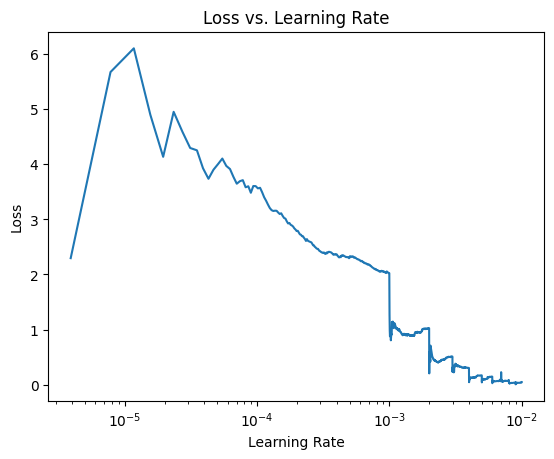

In [7]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [8]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9603
Epoch 1: val_loss improved from inf to 1.21738, saving model to ../../models/best_model_iteration_5_4.h5
256/256 [==============================] - 105s 409ms/step - loss: 0.0458 - accuracy: 0.9603 - val_loss: 1.2174 - val_accuracy: 0.7407
Epoch 2/50
256/256 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9670
Epoch 2: val_loss improved from 1.21738 to 1.18518, saving model to ../../models/best_model_iteration_5_4.h5
256/256 [==============================] - 101s 394ms/step - loss: 0.0351 - accuracy: 0.9670 - val_loss: 1.1852 - val_accuracy: 0.7436
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9747
Epoch 3: val_loss improved from 1.18518 to 1.15613, saving model to ../../models/best_model_iteration_5_4.h5
256/256 [==============================] - 98s 382ms/step - loss: 0.0291 - accuracy: 0.9747 - val_loss: 1.1561 - val_ac

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6137882127842877
Accuracy on test set: 0.7876157164573669
F1 Score: 0.7839431529223579


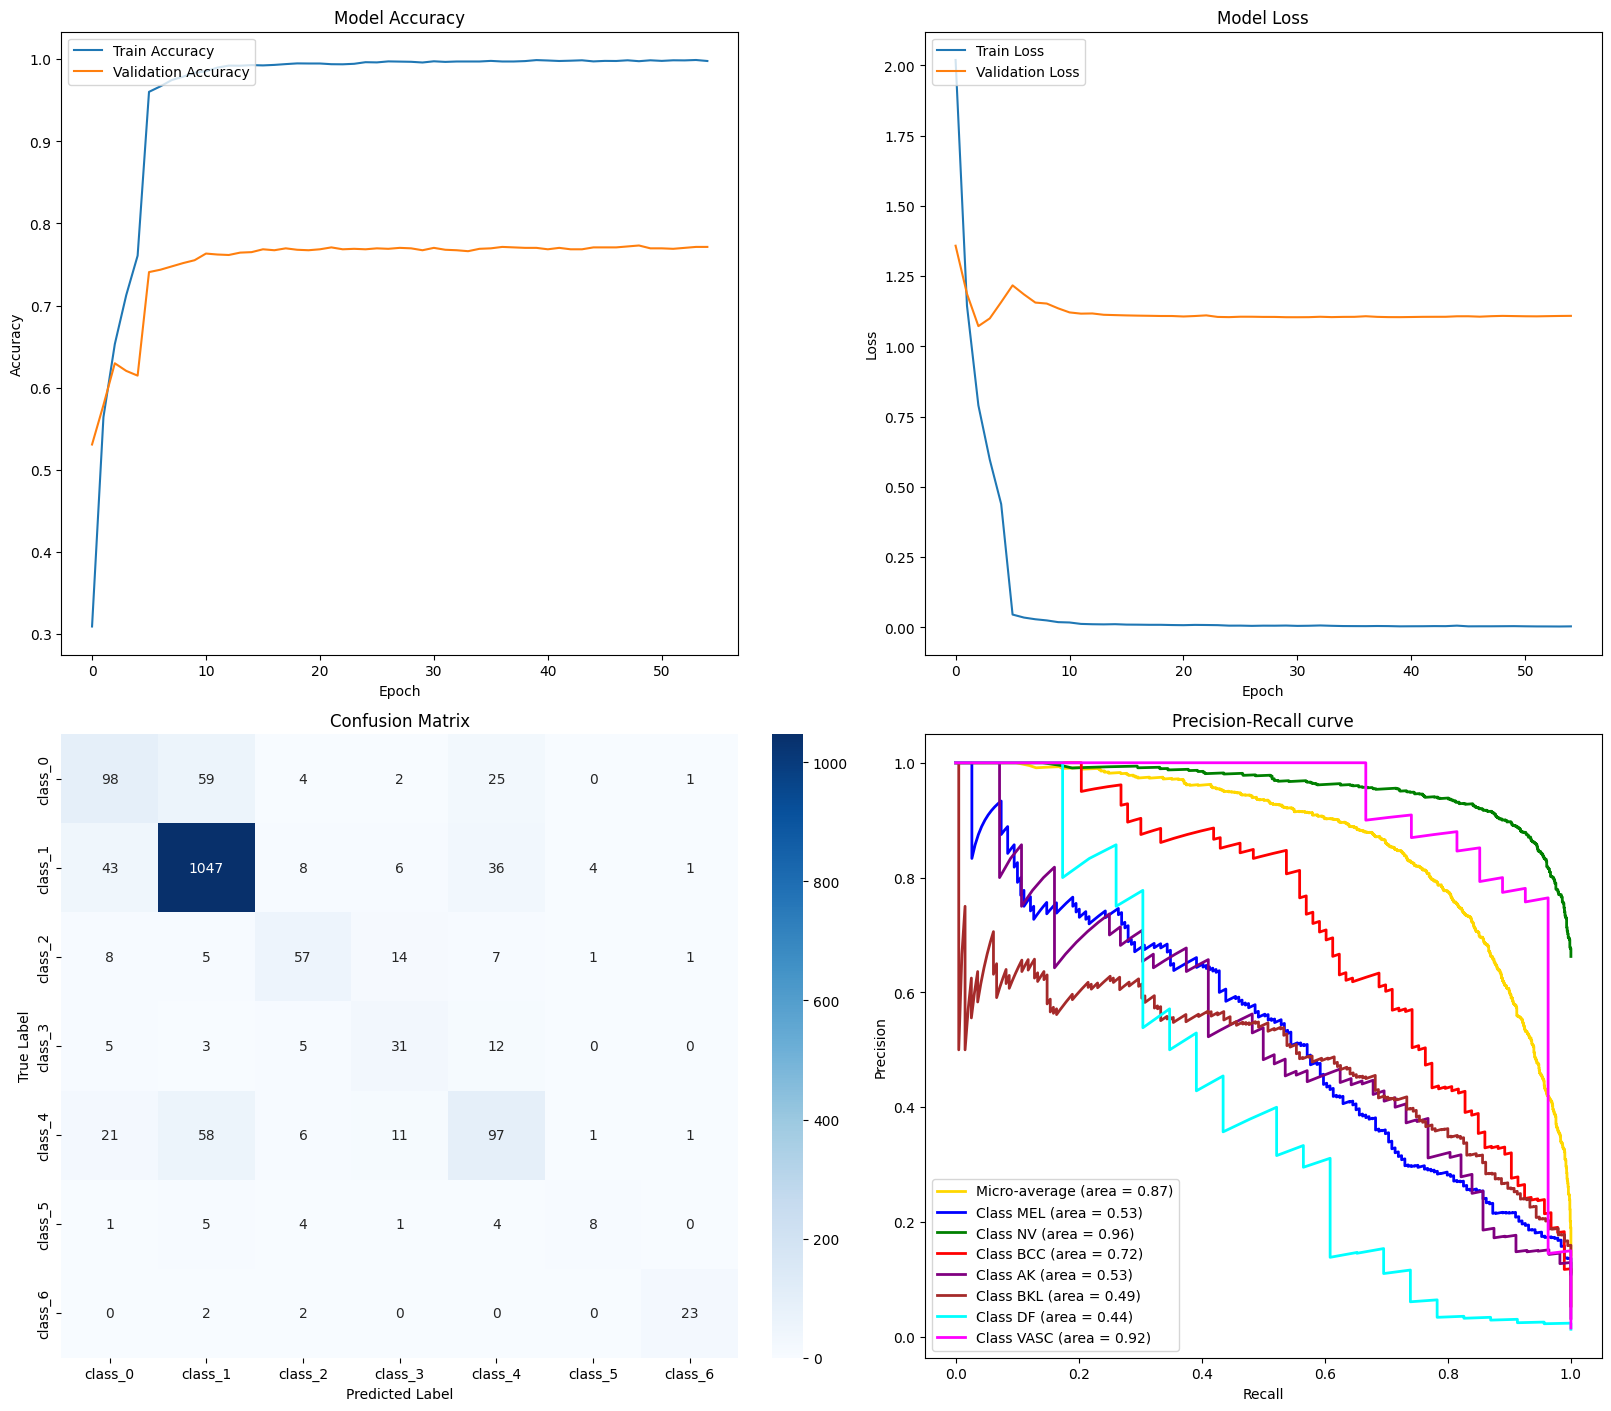

In [12]:

from tensorflow.keras.models import load_model

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_recall_curve, average_precision_score, f1_score
from sklearn.preprocessing import label_binarize

class CombinedHistory:
    def __init__(self, combined_history_dict):
        self.history = combined_history_dict

def combine_histories(histories):
    combined_history = {}
    for key in histories[0].history.keys():
        combined_history[key] = []
        for history in histories:
            combined_history[key].extend(history.history[key])
    return CombinedHistory(combined_history)

# Define the function to plot all metrics including balanced accuracy
def show_all_plots(histories, model, validation_generator):


    if isinstance(histories, list):  # Check if it's a list of histories
        history = combine_histories(histories)
    else:  # If single history is passed, use it directly
        history = histories.history
    


    # Assuming `validation_generator` has class indices mapped to class names
    class_names = list(validation_generator.class_names)
    print(class_names)

    # Calculate balanced accuracy for each epoch

    # Get true labels and predictions for the entire validation set
    y_true = []
    y_pred = []

    for i in range(len(validation_generator)):
        X_val_batch, y_val_batch = validation_generator[i]
        y_pred_batch = model.predict(X_val_batch, verbose=0)
        y_pred.extend(y_pred_batch)  # Keep the raw probabilities for precision-recall
        y_true.extend(y_val_batch)   # Keep the one-hot encoded true labels

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate balanced accuracy, confusion matrix, and F1 score
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    balanced_acc = balanced_accuracy_score(y_true_labels, y_pred_labels)
    conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

    # Print metrics
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Accuracy on test set: {model.evaluate(validation_generator, verbose=0)[1]}")
    print(f"F1 Score: {f1_score(y_true_labels, y_pred_labels, average='weighted')}")

    # Set up a 2x2 grid for the plots
    plt.figure(figsize=(16,14), constrained_layout=True)
    
    # 1. Accuracy plot
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # 2. Loss plot
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # 3. Confusion matrix plot
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 4. Precision-Recall Curve plot
    plt.subplot(2, 2, 4)
    show_precision_recall(y_true, y_pred)

    # Show all the plots
    plt.show()

def show_precision_recall(y_test, predictions):
    class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC']
    
    # Binarize the output for multiclass
    y_test = label_binarize(y_test, classes=range(len(class_names)))
    predictions = np.array(predictions)

    precision = dict()
    recall = dict()
    average_precision = dict()
    
    # Compute Precision-Recall and average precision for each class
    for i in range(len(class_names)):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predictions[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], predictions[:, i])

    # Compute micro-average Precision-Recall curve and area
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), predictions.ravel())
    average_precision["micro"] = average_precision_score(y_test, predictions, average="micro")
    
    # Plot Precision-Recall curve
    plt.plot(recall["micro"], precision["micro"], color='gold', lw=2, label=f'Micro-average (area = {average_precision["micro"]:0.2f})')
    for i, color in enumerate(['blue', 'green', 'red', 'purple', 'brown', 'cyan', 'magenta']):
        plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {class_names[i]} (area = {average_precision[i]:0.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='best')


# Iteration 5.5

In [15]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_5"
model_dir = f'../../models/best_model_{iteration}.h5'

In [16]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [17]:
# Example AUC scores for each class (from the PR curve)
auc_scores = [0.51, 0.96, 0.81, 0.55, 0.64, 0.66, 0.92]  # Replace with your actual AUC values

# Calculate weights inversely proportional to AUC scores
class_weights = {i: 1 / score for i, score in enumerate(auc_scores)}

# Normalize the weights to keep them reasonably scaled
max_weight = max(class_weights.values())
class_weights = {k: v / max_weight for k, v in class_weights.items()}

weights = class_weights

print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 0.5312500000000001, 2: 0.6296296296296297, 3: 0.9272727272727272, 4: 0.796875, 5: 0.7727272727272727, 6: 0.5543478260869565}


In [18]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [19]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 1.6061 - accuracy: 0.2856
Epoch 1: val_loss improved from inf to 1.76317, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 79s 302ms/step - loss: 1.6061 - accuracy: 0.2856 - val_loss: 1.7632 - val_accuracy: 0.3686
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.1131 - accuracy: 0.4762
Epoch 2: val_loss improved from 1.76317 to 1.51916, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 77s 299ms/step - loss: 1.1131 - accuracy: 0.4762 - val_loss: 1.5192 - val_accuracy: 0.4641
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 0.9610 - accuracy: 0.5519
Epoch 3: val_loss improved from 1.51916 to 1.33735, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 83s 324ms/step - loss: 0.9610 - accuracy: 0.5519 - val_loss: 1.3373 - val_accuracy: 0.5556
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 0.8834 - accuracy: 0.5883
Epoch 4: val_loss improved from 1.33735 to 1.22182, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 84s 329ms/step - loss: 0.8834 - accuracy: 0.5883 - val_loss: 1.2218 - val_accuracy: 0.5

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 118s 454ms/step - loss: 1.4475 - accuracy: 0.4636 - val_loss: 1.4000 - val_accuracy: 0.5619
Epoch 2/10
256/256 [==============================] - 110s 427ms/step - loss: 1.0986 - accuracy: 0.5735 - val_loss: 1.2004 - val_accuracy: 0.6285
Epoch 3/10
256/256 [==============================] - 116s 452ms/step - loss: 0.9406 - accuracy: 0.6333 - val_loss: 1.6149 - val_accuracy: 0.5272
Epoch 4/10
256/256 [==============================] - 113s 442ms/step - loss: 0.7903 - accuracy: 0.6678 - val_loss: 1.1563 - val_accuracy: 0.6441
Epoch 5/10
256/256 [==============================] - 110s 431ms/step - loss: 0.6874 - accuracy: 0.7017 - val_loss: 1.3145 - val_accuracy: 0.5926
Epoch 6/10
256/256 [==============================] - 112s 438ms/step - loss: 0.6147 - accuracy: 0.7297 - val_loss: 1.6707 - val_accuracy: 0.5000
Epoch 7/10
256/256 [==============================] - 113s 440ms/step - loss: 0.5536 - accura

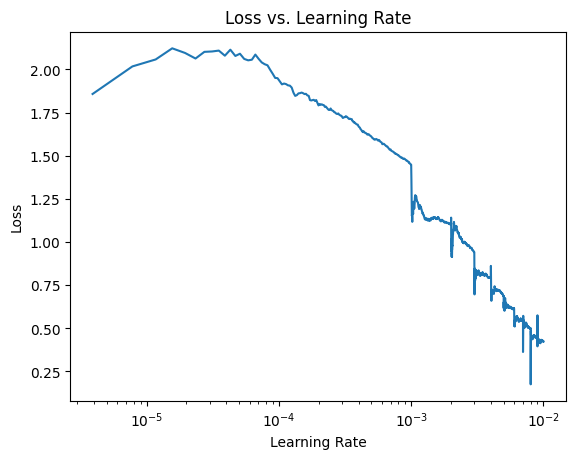

In [20]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [21]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8226
Epoch 1: val_loss improved from inf to 1.45476, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 126s 489ms/step - loss: 0.3928 - accuracy: 0.8226 - val_loss: 1.4548 - val_accuracy: 0.5741
Epoch 2/50
256/256 [==============================] - ETA: 0s - loss: 0.3901 - accuracy: 0.8109
Epoch 2: val_loss improved from 1.45476 to 1.38517, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 113s 439ms/step - loss: 0.3901 - accuracy: 0.8109 - val_loss: 1.3852 - val_accuracy: 0.5932
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 0.3858 - accuracy: 0.8142
Epoch 3: val_loss improved from 1.38517 to 1.31468, saving model to ../../models/best_model_iteration_5_5.h5
256/256 [==============================] - 112s 435ms/step - loss: 0.3858 - accuracy: 0.8142 - val_loss: 1.3147 - val_a

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6589308933867175
Accuracy on test set: 0.6984953880310059
F1 Score: 0.7199704878244366


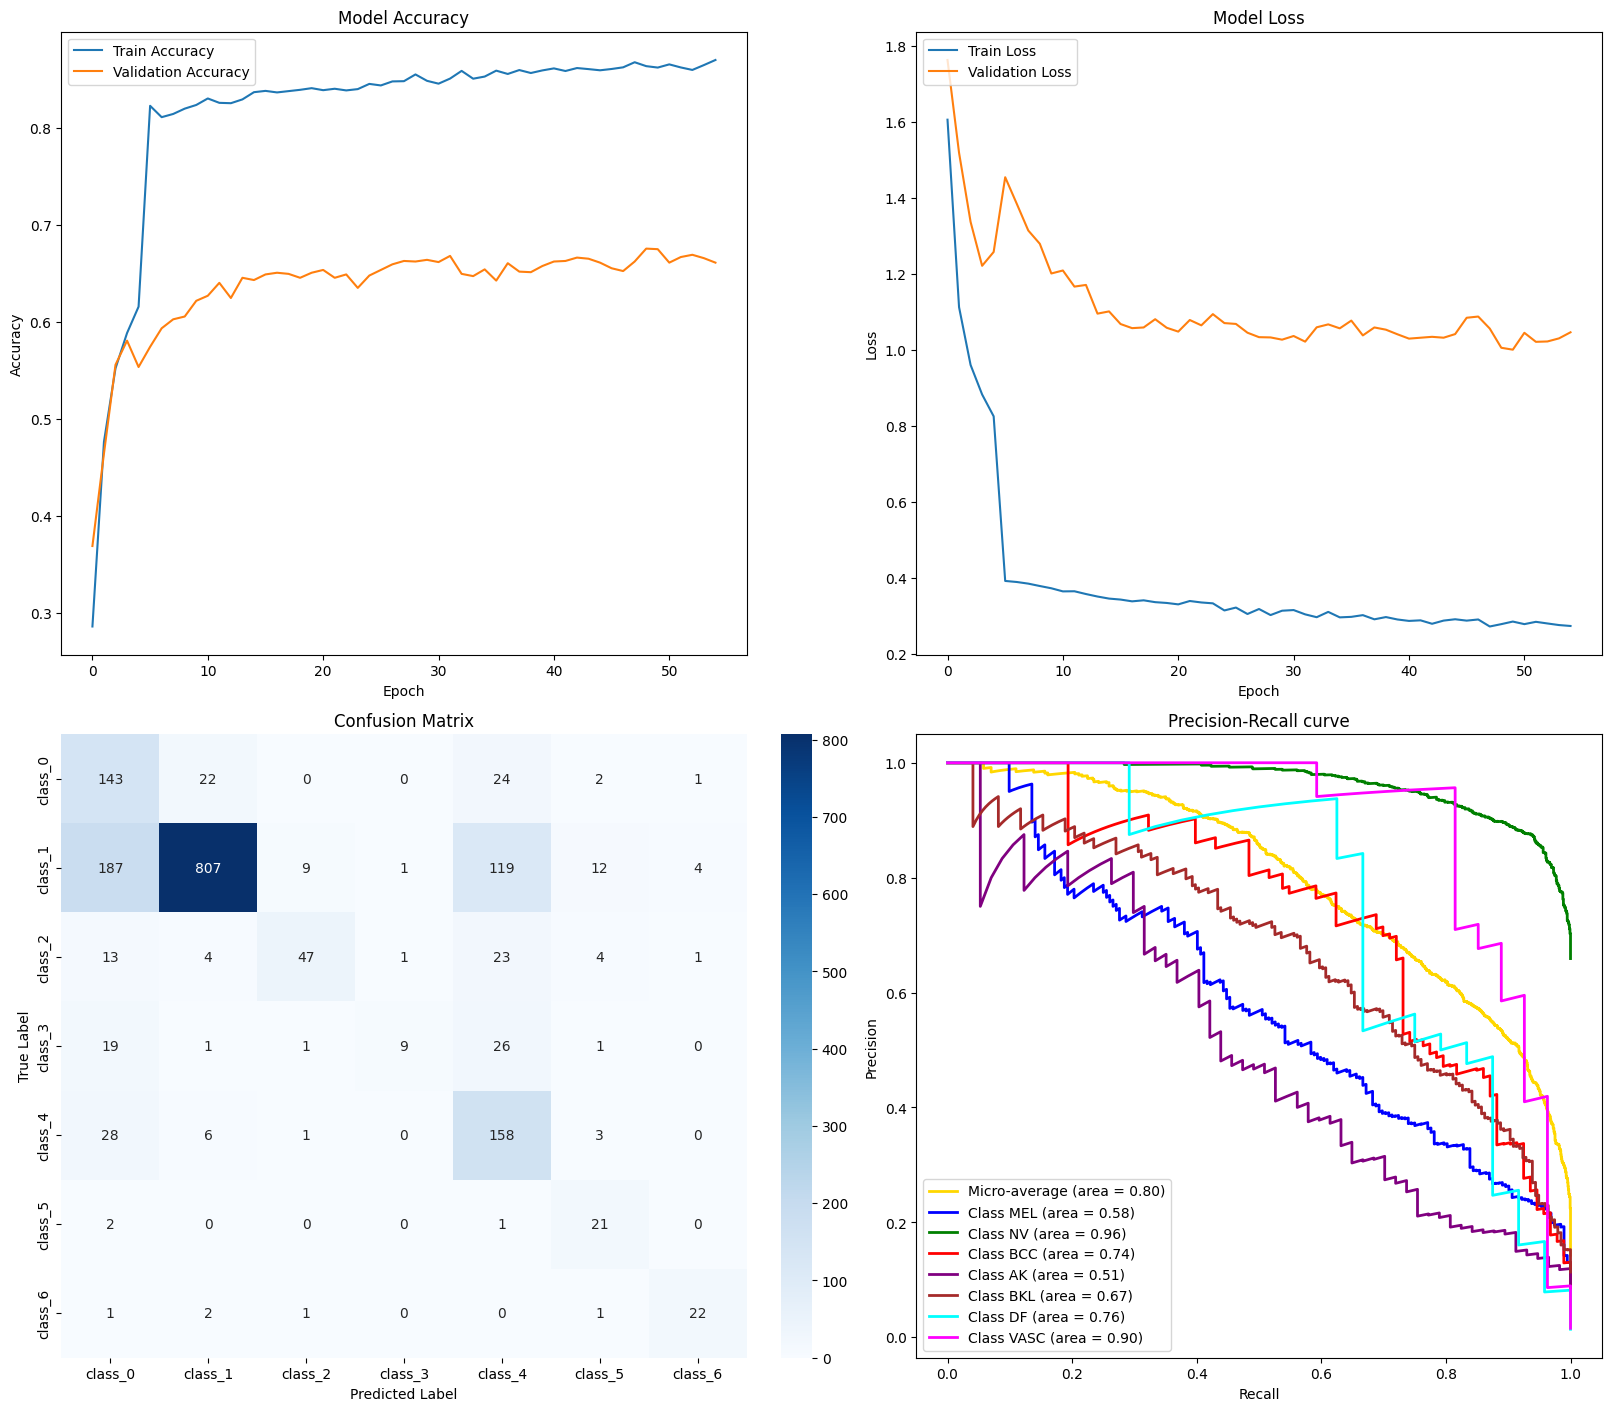

In [22]:

from tensorflow.keras.models import load_model

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

### What did we learn?

- Balanced per batch images seems to be good and improves almost all classes. the combinations of undersampling and oversampling works best.
- Class weight seem to be usefull to penalize specific loss classes however there is a clear tradeoff between the class weight you choses

Did we succes?
- Yes in principle. The fact that the overall accuracy doesnt imporive much is just and indication of being better at all classes but slightly worse at the class with a lot of samples and it therefore scewing the results to be based on how good we are at clasiying class 1.

Problems?
- Sharp plateau
- Overfitting because of large gap 

# Tests

### Do we have vanishing gradients?

In [7]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_test_1"
model_dir = f'../../models/best_model_{iteration}.h5'

In [8]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [9]:
# Example AUC scores for each class (from the PR curve)
auc_scores = [0.51, 0.96, 0.81, 0.55, 0.64, 0.66, 0.92]  # Replace with your actual AUC values

# Calculate weights inversely proportional to AUC scores
class_weights = {i: 1 / score for i, score in enumerate(auc_scores)}

# Normalize the weights to keep them reasonably scaled
max_weight = max(class_weights.values())
class_weights = {k: v / max_weight for k, v in class_weights.items()}

weights = class_weights

print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 0.5312500000000001, 2: 0.6296296296296297, 3: 0.9272727272727272, 4: 0.796875, 5: 0.7727272727272727, 6: 0.5543478260869565}


In [10]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [11]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 1.6363 - accuracy: 0.2927
Epoch 1: val_loss improved from inf to 1.92930, saving model to ../../models/best_model_iteration_5_test_1.h5
256/256 [==============================] - 71s 273ms/step - loss: 1.6363 - accuracy: 0.2927 - val_loss: 1.9293 - val_accuracy: 0.3536
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.1475 - accuracy: 0.4630
Epoch 2: val_loss improved from 1.92930 to 1.73010, saving model to ../../models/best_model_iteration_5_test_1.h5
256/256 [==============================] - 71s 276ms/step - loss: 1.1475 - accuracy: 0.4630 - val_loss: 1.7301 - val_accuracy: 0.4184
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 0.9799 - accuracy: 0.5425
Epoch 3: val_loss improved from 1.73010 to 1.62271, saving model to ../../models/best_model_iteration_5_test_1.h5
256/256 [==============================] - 72s 282ms/step - loss: 0.9799 - accuracy: 0.5425 - val_loss: 1.6227 - val_accuracy: 0.4769
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 0.8880 - accuracy: 0.5900
Epoch 4: val_loss improved from 1.62271 to 1.42448, saving model to ../../models/best_model_iteration_5_test_1.h5
256/256 [==============================] - 76s 296ms/step - loss: 0.8880 - accuracy: 0.5900 - val_loss: 1.4245 - va

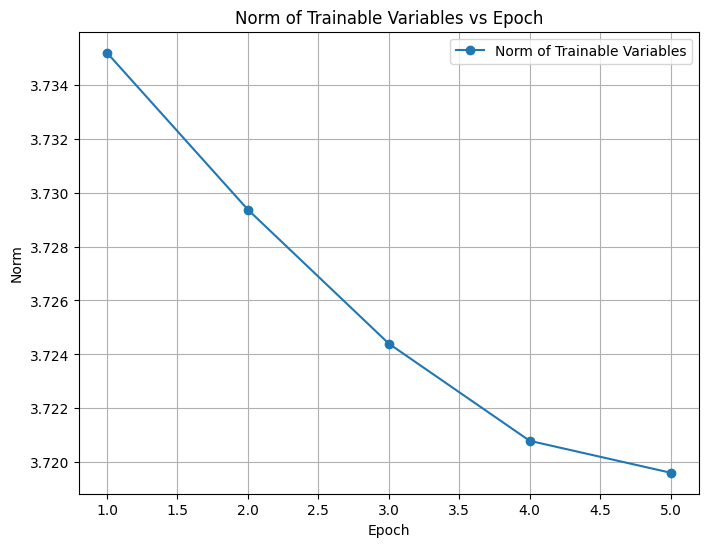

In [12]:
model.plot_trainable_weights()

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 106s 404ms/step - loss: 1.4641 - accuracy: 0.4613 - val_loss: 1.2543 - val_accuracy: 0.6036
Epoch 2/10
256/256 [==============================] - 94s 365ms/step - loss: 1.1139 - accuracy: 0.5702 - val_loss: 1.2235 - val_accuracy: 0.6424
Epoch 3/10
256/256 [==============================] - 107s 419ms/step - loss: 0.9342 - accuracy: 0.6343 - val_loss: 1.8048 - val_accuracy: 0.4959
Epoch 4/10
256/256 [==============================] - 104s 404ms/step - loss: 0.7966 - accuracy: 0.6676 - val_loss: 1.0961 - val_accuracy: 0.6707
Epoch 5/10
256/256 [==============================] - 105s 409ms/step - loss: 0.6762 - accuracy: 0.7058 - val_loss: 1.1494 - val_accuracy: 0.6481
Epoch 6/10
256/256 [==============================] - 98s 383ms/step - loss: 0.6169 - accuracy: 0.7306 - val_loss: 1.2093 - val_accuracy: 0.6325
Epoch 7/10
256/256 [==============================] - 97s 377ms/step - loss: 0.5445 - accuracy:

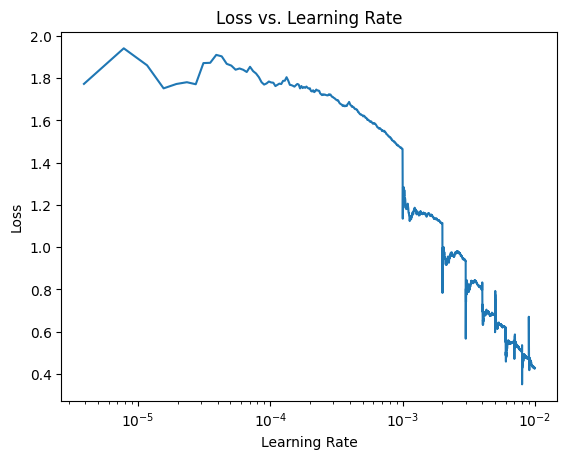

In [13]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [14]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=25, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

Epoch 1/25
256/256 [==============================] - ETA: 0s - loss: 0.3998 - accuracy: 0.8120
Epoch 1: val_loss improved from inf to 1.22209, saving model to ../../models/best_model_iteration_5_test_1.h5
256/256 [==============================] - 103s 402ms/step - loss: 0.3998 - accuracy: 0.8120 - val_loss: 1.2221 - val_accuracy: 0.6285
Epoch 2/25
256/256 [==============================] - ETA: 0s - loss: 0.4136 - accuracy: 0.8055
Epoch 2: val_loss improved from 1.22209 to 1.16067, saving model to ../../models/best_model_iteration_5_test_1.h5
256/256 [==============================] - 98s 383ms/step - loss: 0.4136 - accuracy: 0.8055 - val_loss: 1.1607 - val_accuracy: 0.6377
Epoch 3/25
256/256 [==============================] - ETA: 0s - loss: 0.3822 - accuracy: 0.8174
Epoch 3: val_loss did not improve from 1.16067
256/256 [==============================] - 100s 390ms/step - loss: 0.3822 - accuracy: 0.8174 - val_loss: 1.1994 - val_accuracy: 0.6233
Epoch 4/25
256/256 [=================

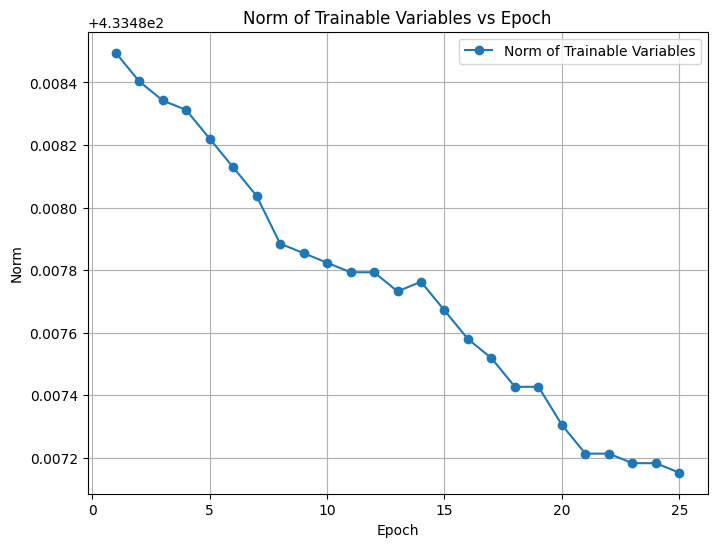

In [15]:
model.plot_trainable_weights()

How about without the lr find?

In [20]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_5_test_2"
model_dir = f'../../models/best_model_{iteration}.h5'

In [21]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [22]:
# Example AUC scores for each class (from the PR curve)
auc_scores = [0.51, 0.96, 0.81, 0.55, 0.64, 0.66, 0.92]  # Replace with your actual AUC values

# Calculate weights inversely proportional to AUC scores
class_weights = {i: 1 / score for i, score in enumerate(auc_scores)}

# Normalize the weights to keep them reasonably scaled
max_weight = max(class_weights.values())
class_weights = {k: v / max_weight for k, v in class_weights.items()}

weights = class_weights

print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 0.5312500000000001, 2: 0.6296296296296297, 3: 0.9272727272727272, 4: 0.796875, 5: 0.7727272727272727, 6: 0.5543478260869565}


In [23]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [25]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=10, class_weight=weights, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 1.5186 - accuracy: 0.3053
Epoch 1: val_loss improved from inf to 1.74990, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 77s 300ms/step - loss: 1.5186 - accuracy: 0.3053 - val_loss: 1.7499 - val_accuracy: 0.3814
Epoch 2/10


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.1274 - accuracy: 0.4664
Epoch 2: val_loss improved from 1.74990 to 1.49370, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 73s 286ms/step - loss: 1.1274 - accuracy: 0.4664 - val_loss: 1.4937 - val_accuracy: 0.4676
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 0.9642 - accuracy: 0.5474
Epoch 3: val_loss improved from 1.49370 to 1.36995, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 70s 272ms/step - loss: 0.9642 - accuracy: 0.5474 - val_loss: 1.3699 - val_accuracy: 0.5284
Epoch 4/10
256/256 [==============================] - ETA: 0s - loss: 0.8799 - accuracy: 0.5879
Epoch 4: val_loss improved from 1.36995 to 1.21913, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 70s 275ms/step - loss: 0.8799 - accuracy: 0.5879 - val_loss: 1.2191 - 

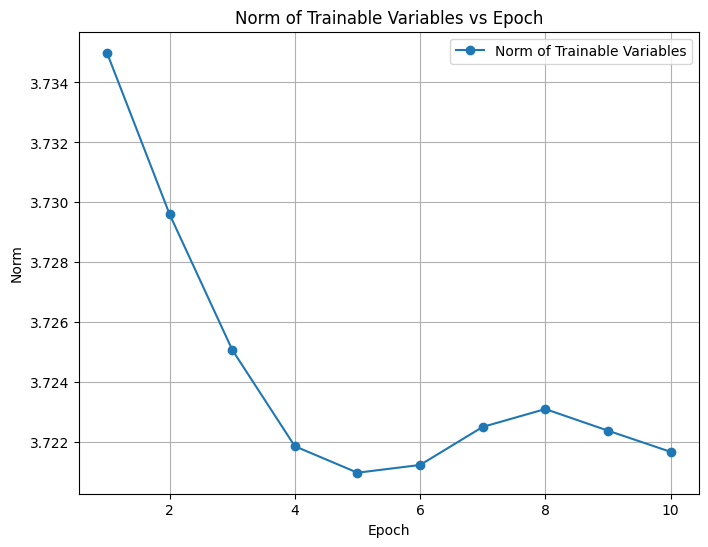

In [26]:
model.plot_trainable_weights()

In [27]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=10, class_weight=weights, checkpoint_path=model_dir)
histories.append(history2)

Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.7003
Epoch 1: val_loss improved from inf to 1.13485, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 69s 267ms/step - loss: 0.6256 - accuracy: 0.7003 - val_loss: 1.1348 - val_accuracy: 0.6337
Epoch 2/10


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.6229 - accuracy: 0.7057
Epoch 2: val_loss did not improve from 1.13485
256/256 [==============================] - 71s 277ms/step - loss: 0.6229 - accuracy: 0.7057 - val_loss: 1.2292 - val_accuracy: 0.5955
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.7086
Epoch 3: val_loss improved from 1.13485 to 0.98502, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 73s 286ms/step - loss: 0.6141 - accuracy: 0.7086 - val_loss: 0.9850 - val_accuracy: 0.6649
Epoch 4/10
256/256 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.7041
Epoch 4: val_loss did not improve from 0.98502
256/256 [==============================] - 69s 268ms/step - loss: 0.6267 - accuracy: 0.7041 - val_loss: 1.3354 - val_accuracy: 0.5723
Epoch 5/10
256/256 [==============================] - ETA: 0s - loss: 0.6171 - accuracy: 0.7120
Epoch 5: val_loss

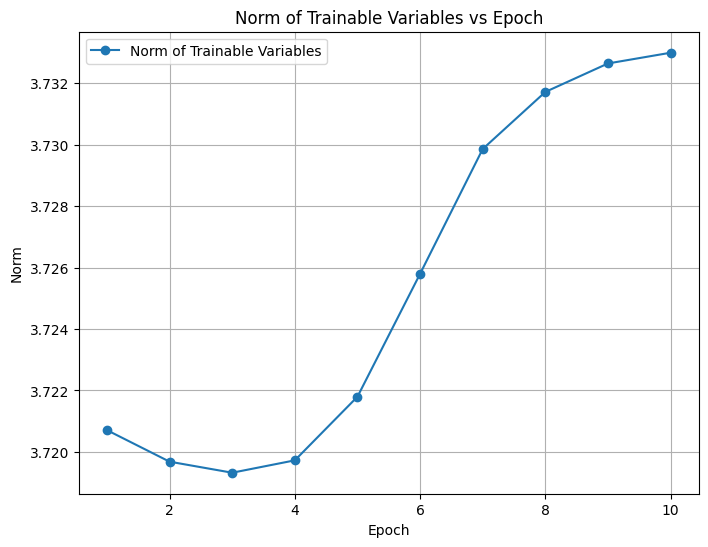

In [28]:
model.plot_trainable_weights()

In [31]:
model.unfreeze()
history3 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history3)

All layers have been unfrozen.
Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 0.5438 - accuracy: 0.7418
Epoch 1: val_loss improved from inf to 1.11341, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 72s 282ms/step - loss: 0.5438 - accuracy: 0.7418 - val_loss: 1.1134 - val_accuracy: 0.6209
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.5326 - accuracy: 0.7445
Epoch 2: val_loss improved from 1.11341 to 1.05384, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 71s 277ms/step - loss: 0.5326 - accuracy: 0.7445 - val_loss: 1.0538 - val_accuracy: 0.6400
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 0.5490 - accuracy: 0.7357
Epoch 3: val_loss did not improve from 1.05384
256/256 [==============================] - 73s 287ms/step - loss: 0.5490 - accuracy: 0.7357 - val_loss: 1.1980 - val_accuracy: 0.6053
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.7345
Epoch 4: val_loss did not improve from 1.05384
256/256 [==============================] - 76s 297ms/step - loss: 0.5499 - accuracy: 0.7345 - val_loss: 1.1578 - val_accuracy: 0.6175
Epoch 5/5
256/256 [==============================] - ETA: 0s - loss: 0.5523 - accuracy: 0.7354
Epoch 5: val_loss di

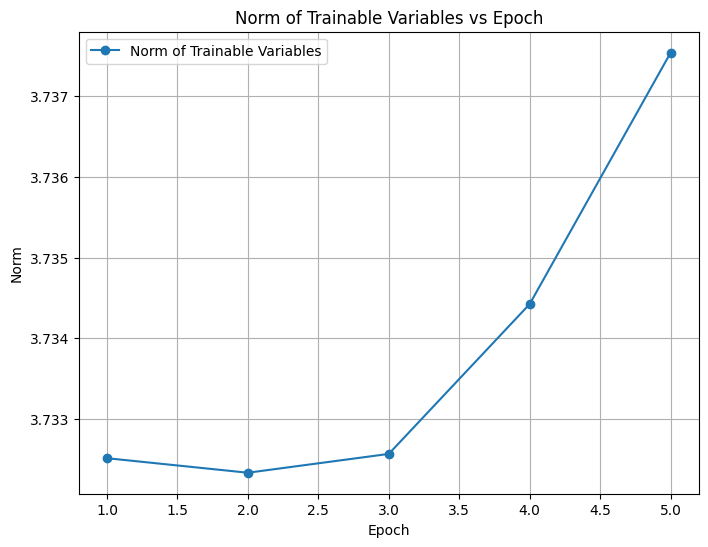

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6044935191202907
Accuracy on test set: 0.6614583134651184
F1 Score: 0.6917792780865075


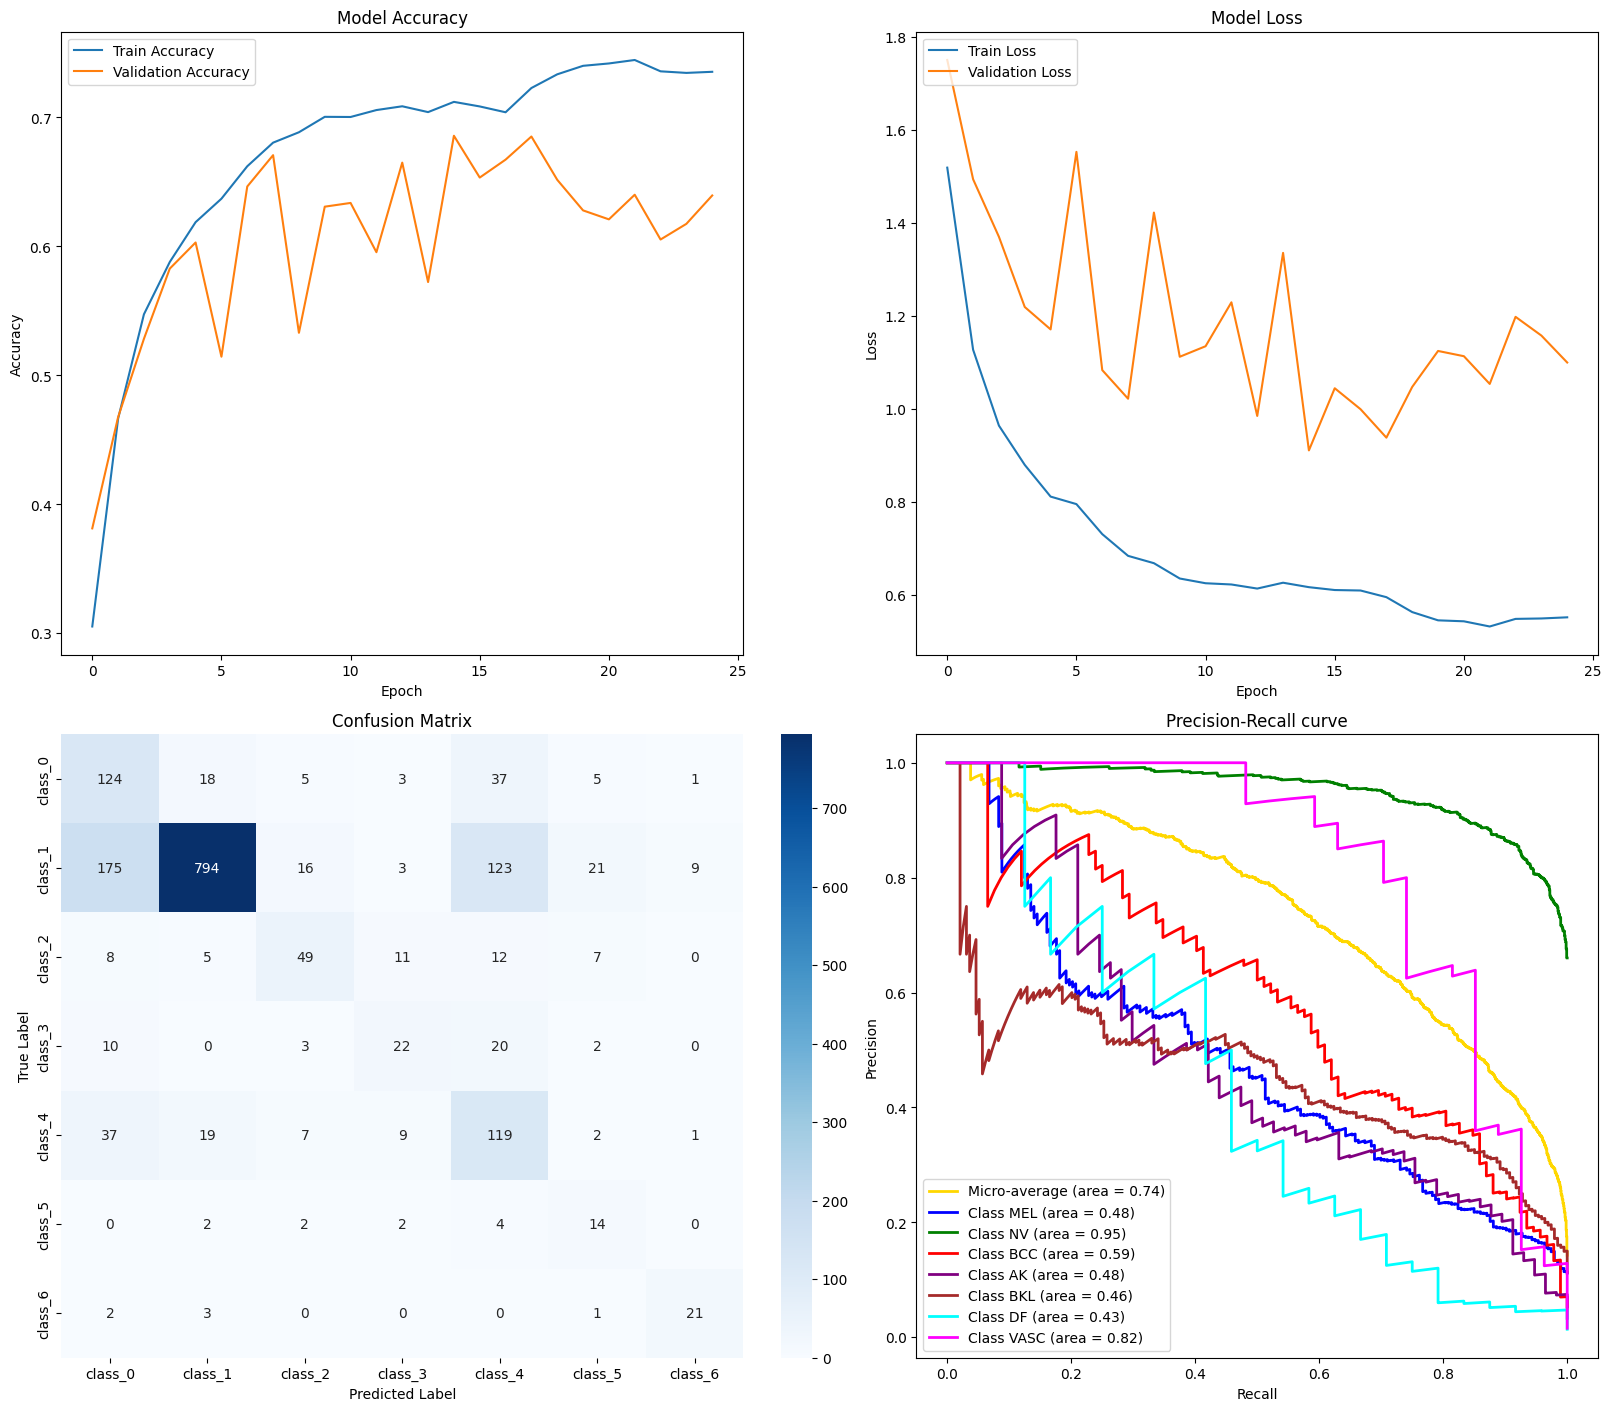

In [32]:
model.plot_trainable_weights()
show_all_plots(histories, m, test_generator)

In [33]:
history4 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history4)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.7495
Epoch 1: val_loss improved from inf to 0.97191, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 73s 285ms/step - loss: 0.5224 - accuracy: 0.7495 - val_loss: 0.9719 - val_accuracy: 0.6690
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.7581
Epoch 2: val_loss did not improve from 0.97191
256/256 [==============================] - 73s 284ms/step - loss: 0.5104 - accuracy: 0.7581 - val_loss: 1.0644 - val_accuracy: 0.6493
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 0.5323 - accuracy: 0.7430
Epoch 3: val_loss did not improve from 0.97191
256/256 [==============================] - 72s 280ms/step - loss: 0.5323 - accuracy: 0.7430 - val_loss: 1.0116 - val_accuracy: 0.6586
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 0.5301 - accuracy: 0.7474
Epoch 4: val_loss did not improve from 0.97191
256/256 [==============================] - 71s 278ms/step - loss: 0.5301 - accuracy: 0.7474 - val_loss: 1.0615 - val_accuracy: 0.6412
Epoch 5/5
256/256 [==============================] - ETA: 0s - loss: 0.5407 - accuracy: 0.7410
Epoch 5: val_loss did not improve from 0.97191
256/256 [==============================]

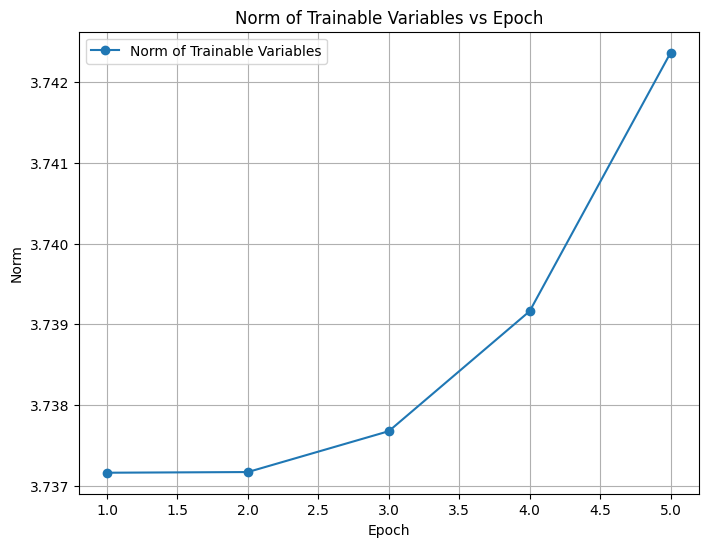

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6044935191202907
Accuracy on test set: 0.6614583134651184
F1 Score: 0.6917792780865075


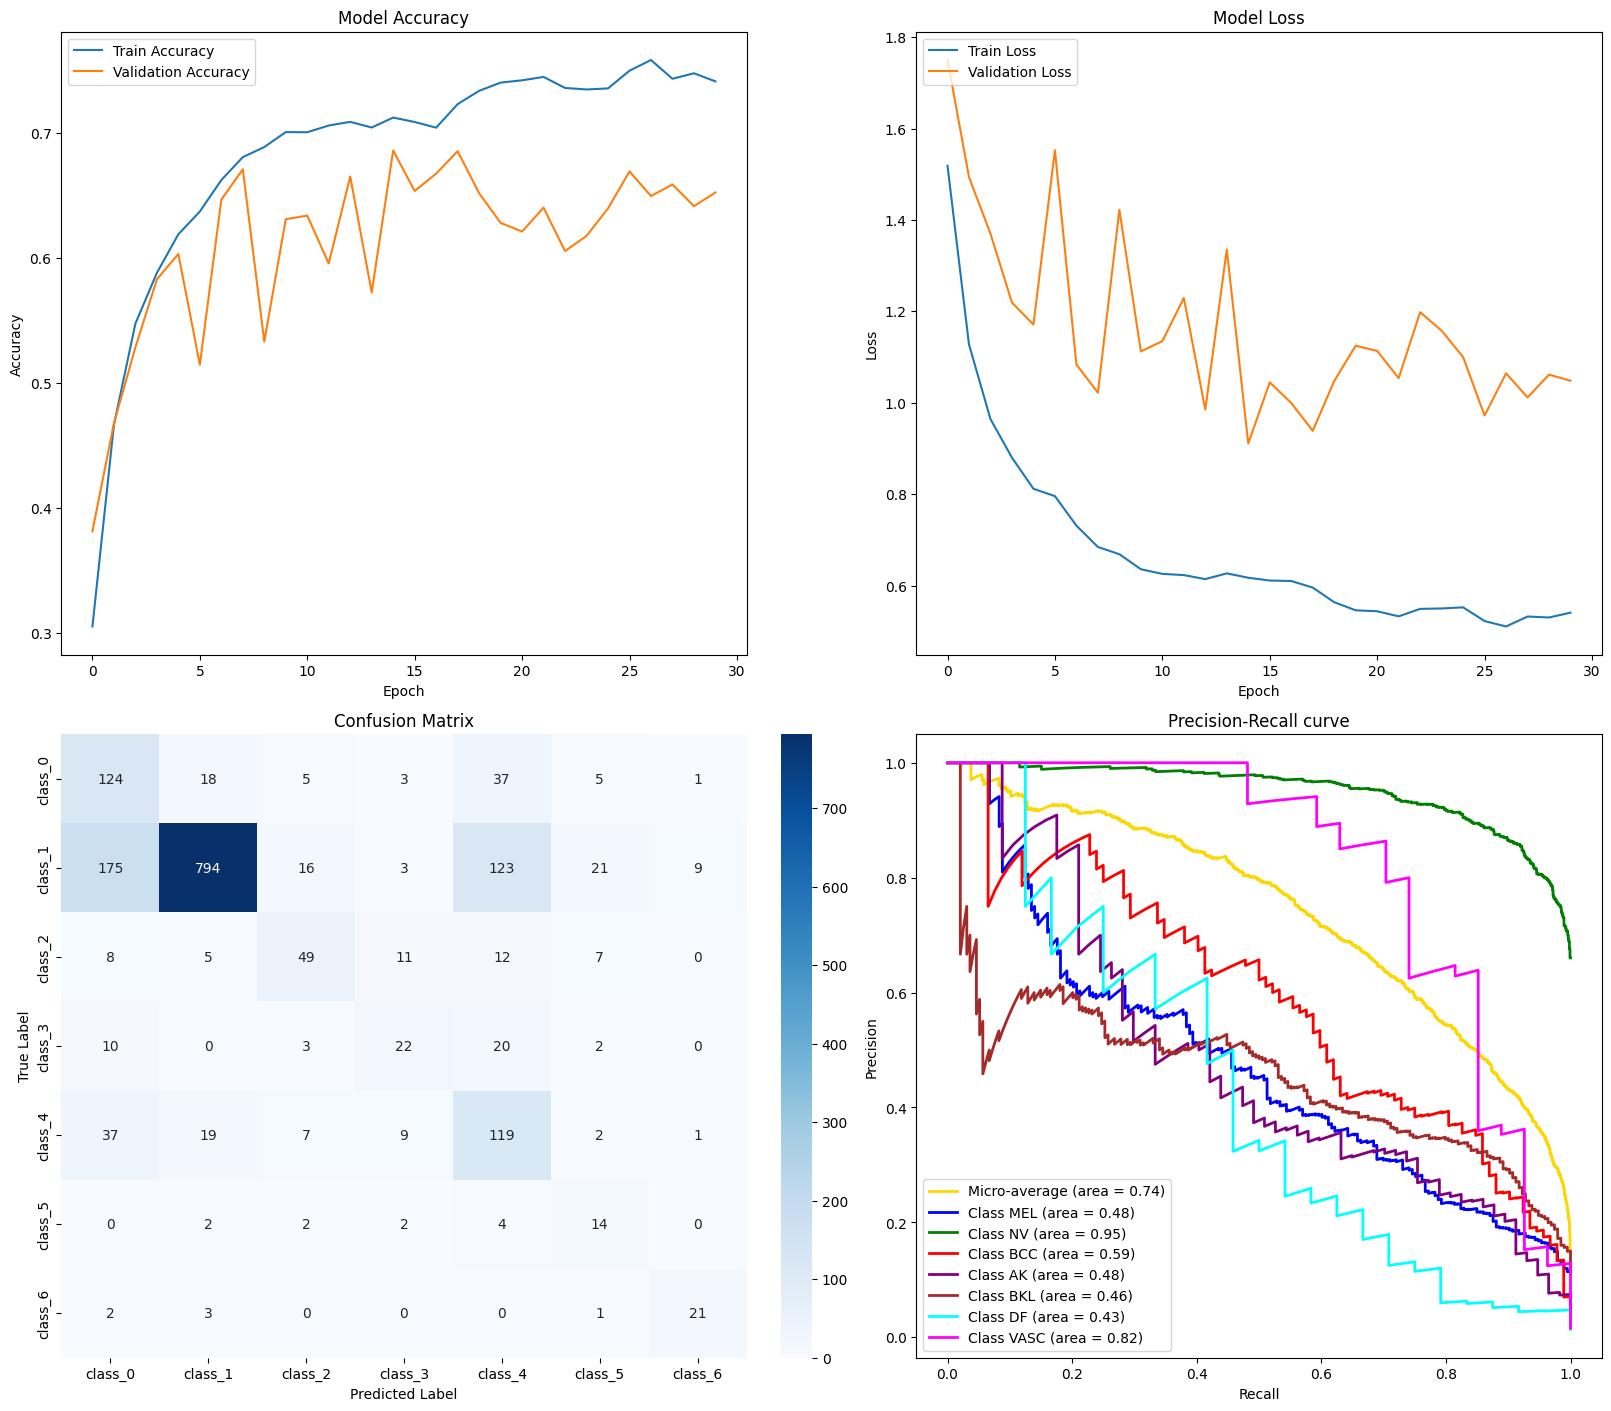

In [34]:
model.plot_trainable_weights()
show_all_plots(histories, m, test_generator)

In [35]:
history5 = model.fit_epochs(train_generator, validation_generator, epochs=10, class_weight=weights, checkpoint_path=model_dir)
histories.append(history5)

Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 0.5081 - accuracy: 0.7593
Epoch 1: val_loss improved from inf to 1.00117, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 70s 273ms/step - loss: 0.5081 - accuracy: 0.7593 - val_loss: 1.0012 - val_accuracy: 0.6649
Epoch 2/10


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.7568
Epoch 2: val_loss improved from 1.00117 to 0.91510, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 70s 275ms/step - loss: 0.5076 - accuracy: 0.7568 - val_loss: 0.9151 - val_accuracy: 0.6846
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7539
Epoch 3: val_loss improved from 0.91510 to 0.91262, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 72s 282ms/step - loss: 0.5019 - accuracy: 0.7539 - val_loss: 0.9126 - val_accuracy: 0.6788
Epoch 4/10
256/256 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.7529
Epoch 4: val_loss did not improve from 0.91262
256/256 [==============================] - 72s 279ms/step - loss: 0.5220 - accuracy: 0.7529 - val_loss: 1.0824 - val_accuracy: 0.6395
Epoch 5/10
256/256 [==========================

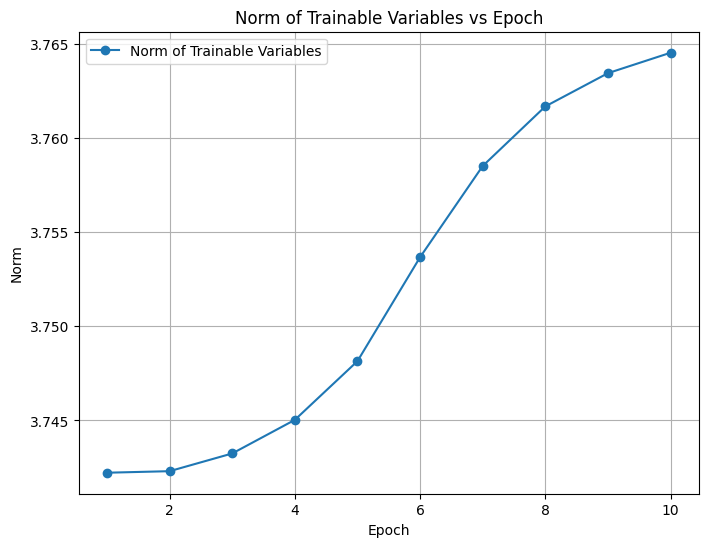

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6044935191202907
Accuracy on test set: 0.6614583134651184
F1 Score: 0.6917792780865075


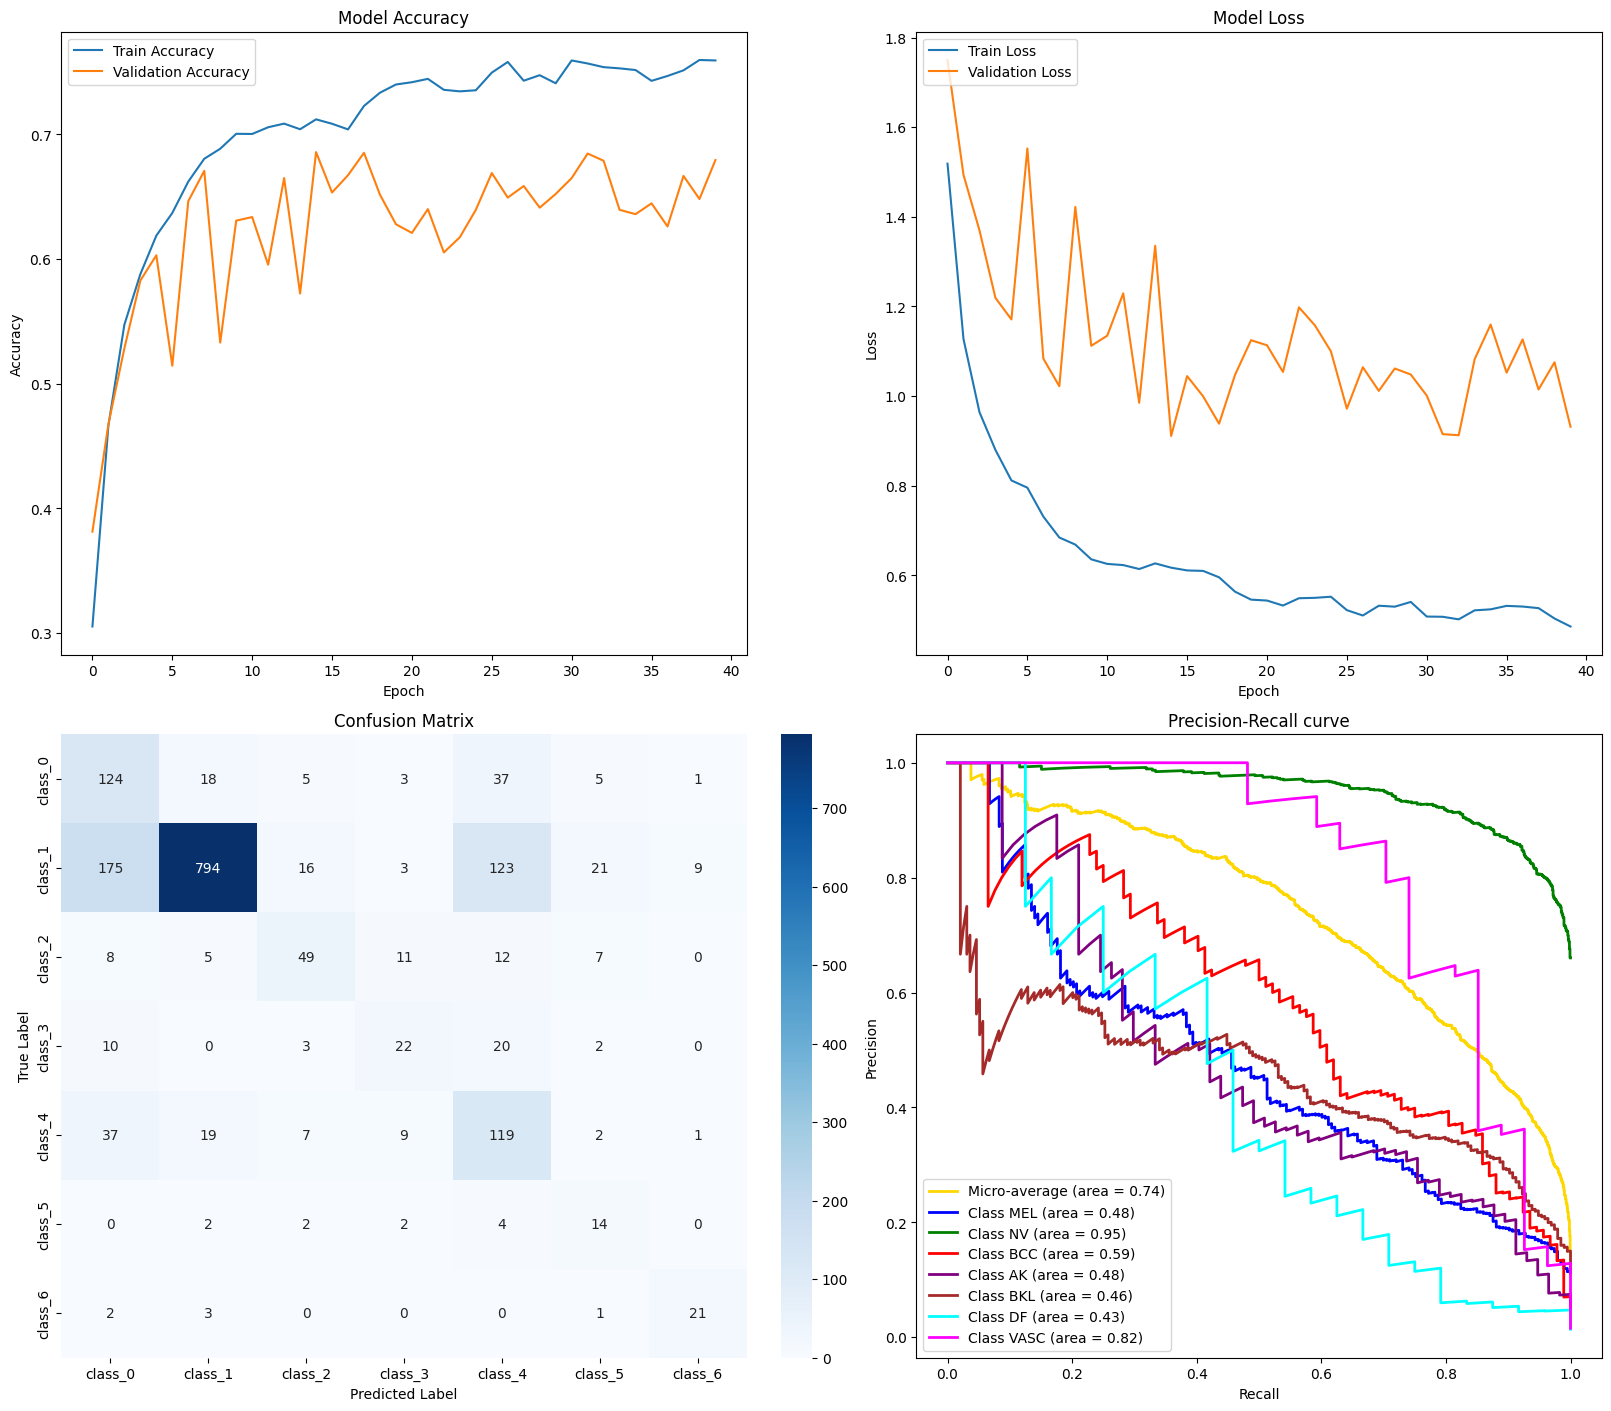

In [36]:
model.plot_trainable_weights()
show_all_plots(histories, m, test_generator)

In [38]:
history6 = model.fit_epochs(train_generator, validation_generator, epochs=10, class_weight=weights, lr=[1e-5,1e-4], checkpoint_path=model_dir)
histories.append(history6)

Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 0.4800 - accuracy: 0.7675
Epoch 1: val_loss improved from inf to 0.95444, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 70s 274ms/step - loss: 0.4800 - accuracy: 0.7675 - val_loss: 0.9544 - val_accuracy: 0.6742
Epoch 2/10


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.4797 - accuracy: 0.7681
Epoch 2: val_loss did not improve from 0.95444
256/256 [==============================] - 70s 272ms/step - loss: 0.4797 - accuracy: 0.7681 - val_loss: 0.9607 - val_accuracy: 0.6690
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.7799
Epoch 3: val_loss did not improve from 0.95444
256/256 [==============================] - 70s 273ms/step - loss: 0.4662 - accuracy: 0.7799 - val_loss: 0.9677 - val_accuracy: 0.6672
Epoch 4/10
256/256 [==============================] - ETA: 0s - loss: 0.4694 - accuracy: 0.7705
Epoch 4: val_loss improved from 0.95444 to 0.94662, saving model to ../../models/best_model_iteration_5_test_2.h5
256/256 [==============================] - 70s 273ms/step - loss: 0.4694 - accuracy: 0.7705 - val_loss: 0.9466 - val_accuracy: 0.6817
Epoch 5/10
256/256 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.7764
Epoch 5: val_loss

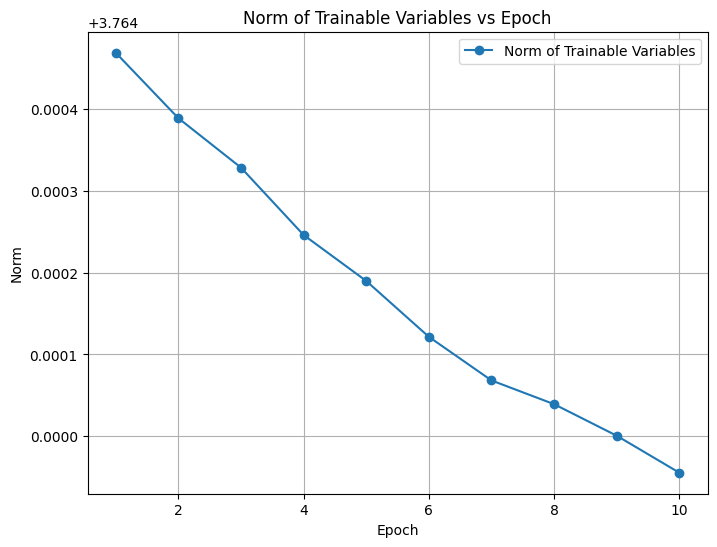

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6044935191202907
Accuracy on test set: 0.6614583134651184
F1 Score: 0.6917792780865075


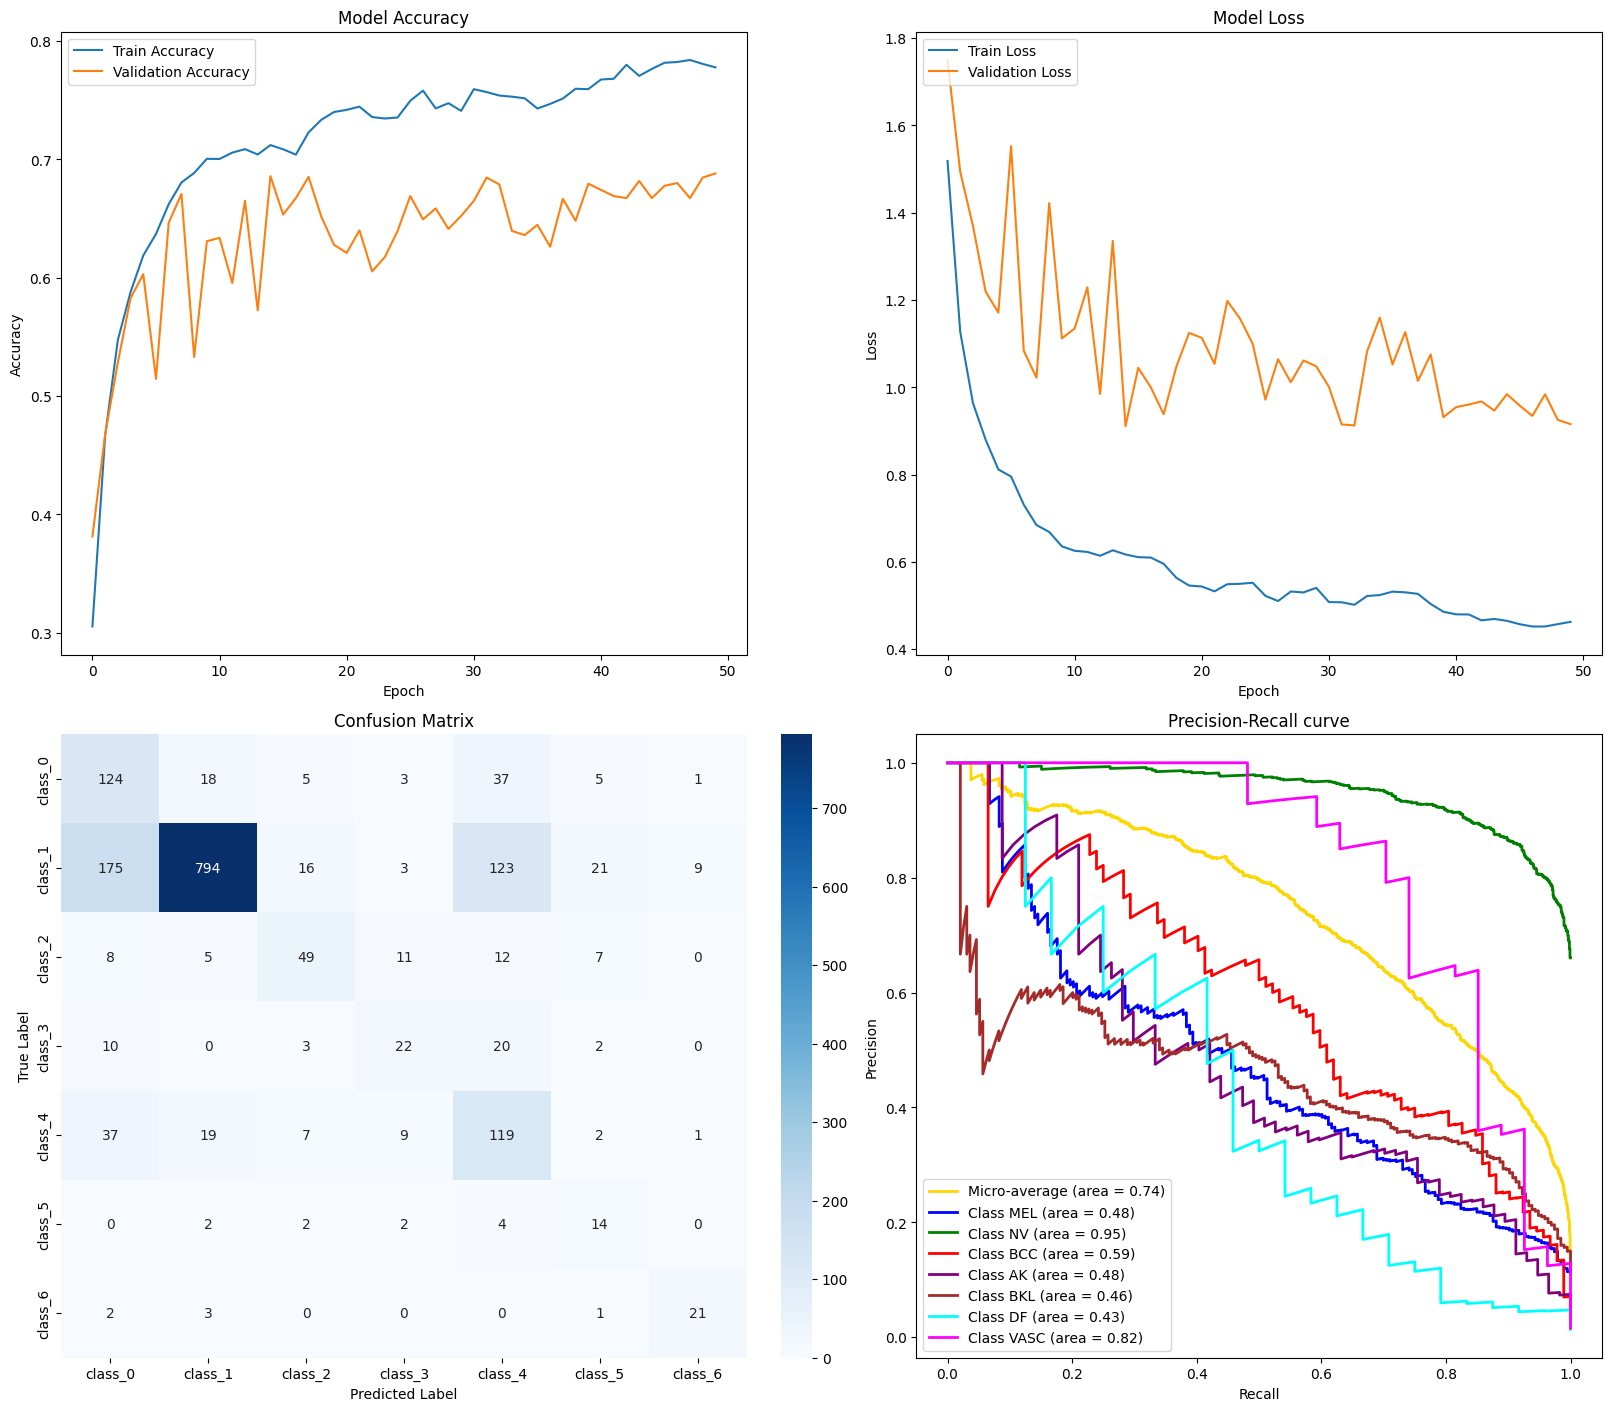

In [39]:
model.plot_trainable_weights()
show_all_plots(histories, m, test_generator)